# Regular Functions
In this notebook we shall compare and contrast the modeling capabilities of different functions provided in submodlib.

## Hand-crafted Data

To carefully observe the characteristics of the optimal set obtained by the maximization of these functions, we begin by creating a controlled dataset of 43 2D points as below. Specifically we have some clusters and some outliers in this dataset.

In [1]:
import numpy as np
groundData =np.array( [(4.5,13.5), (5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), (15.5,6.5),
(7.5,10), (12.5,10), (10,12.5), (10,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]
repData =np.array( [(6.7,13.5), (7.2,13.5), (7.7,13.5), (16.7,13.5), (17.2,13.5), (17.7,13.5),
(6.7,13), (7.2,13), (7.7,13), (16.7,13), (17.2,13), (17.7,13),
(6.7,12.5), (7.2,12.5), (7.7,12.5), (16.7,12.5), (17.2,12.5), (17.7,12.5),
(6.7,7.5), (7.2,7.5), (7.7,7.5), (16.7,7.5), (17.2,7.5), (17.7,7.5),
(6.7,7), (7.2,7), (7.7,7), (16.7,7), (17.2,7), (17.7,7),
(6.7,6.5), (7.2,6.5), (7.7,6.5), (16.7,6.5), (17.2,6.5), (17.7,6.5)] )
repxs = [x[0] for x in repData]
repys = [x[1] for x in repData]

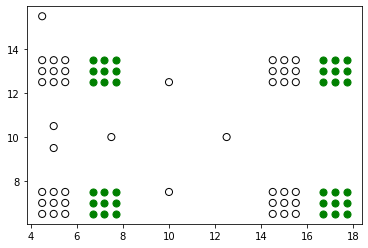

In [2]:
import matplotlib.pyplot as plt
#plt.scatter(groundxs, groundys, s=50, color='black', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")

## Selection by Facility Location

Following the basic usage of functions as discussed in [Basic Usage](Basic%20Usage.ipynb) we instantiate a [FacilityLocation](https://submodlib.readthedocs.io/en/latest/functions/facilityLocation.html) object (in this paerticular case a dense similarity kernel will be created internally in C++) and maximize it to find the optimal set of size 10. We visualize the points in the optimal set (blue) along with the order in which they got picked up by the naive greedy max algorithm.

[(29, 4.427680425811559), (8, 4.030145341530442), (26, 3.4213215708732605), (11, 3.421319901943207), (32, 0.05108782649040222), (20, 0.05108782649040222), (14, 0.05108782649040222), (2, 0.05108782649040222), (35, 0.051087766885757446), (23, 0.051087766885757446)]


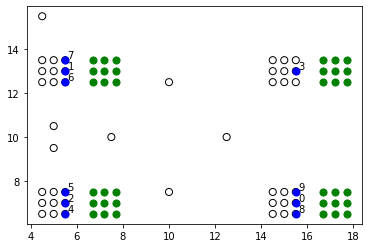

In [3]:
from submodlib import FacilityLocationFunction
objFL = FacilityLocationFunction(n=43, data=groundData, separate_rep=True, n_rep=36, data_rep=repData, mode="dense", metric="euclidean")
greedyList = objFL.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

In case of FacilityLocation we observe that the cluster centers get picked up first followed by the other diverse oints in the data set and the outlier point is picked up only at the end. Had the budget been less than 10, the outlier wouldn't even have got picked up. This is expected as Facility Location primarily models **representation**. 

## Selection by Disparity Sum

Following the basic usage of functions as discussed in [Basic Usage](Basic%20Usage.ipynb) we instantiate a [DisparitySum](https://submodlib.readthedocs.io/en/latest/functions/disparitySum.html) object (in this particular case a dense similarity kernel will be created internally in C++) and maximize it to find the optimal set of size 10. We visualize the points in the optimal set (blue) along with the order in which they got picked up by the naive greedy max algorithm.

[(42, 0.0), (35, 0.9963682889938354), (5, 1.9655494093894958), (40, 2.914377808570862), (39, 3.8598334789276123), (30, 4.7889745235443115), (38, 5.711325526237488), (37, 6.415211915969849), (6, 7.291852235794067), (23, 8.10202944278717)]


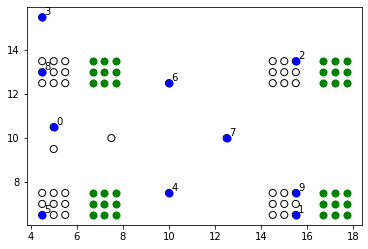

In [60]:
from submodlib import DisparitySumFunction
objDM = DisparitySumFunction(n=43, data=groundData, mode="dense", metric="euclidean")
greedyList = objDM.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

In case of DisparitySum we observe that the remote corner points get picked up first followed by the other diverse points in the data set **including** the outlier point. This is expected as Disparity Sum primarily models **diversity** and wouldn't mind picking up outlier points if that makes the set diverse enough, compromising on the representativeness of the set with respect to the ground set.

## Selection by Feature Based (Logarithmic) Function and Similarity with Represented Dataset as Features

[(37, 16.941442406665928), (36, 11.448247461907684), (38, 8.534016466842223), (39, 6.906696171189598), (15, 5.367459074399973), (21, 4.478403315904598), (16, 3.7997658728882673), (20, 3.445986085075609), (9, 3.1556953786002717), (14, 2.8623475706001744)]


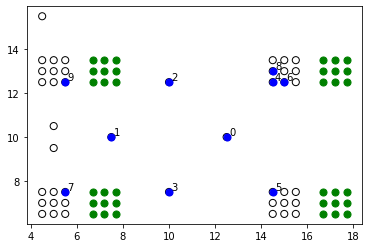

In [61]:
from submodlib import FeatureBasedFunction
from scipy.spatial import distance
from submodlib_cpp import FeatureBased
distanceMatrix = distance.cdist(groundData, repData, 'euclidean')
similarityMatrix = 1-distanceMatrix
features = []
for i in range(43):
    #features.append(distanceMatrix[i].tolist())
    features.append(similarityMatrix[i].tolist())
objFB = FeatureBasedFunction(n=43, features=features, numFeatures=36, sparse=False, mode=FeatureBased.logarithmic)
greedyList = objFB.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

## Selection by GraphCut Function

### Lambda = 0 (Only representation)

[(29, 4.427680425811559), (11, 4.427680425811559), (23, 4.415696199517697), (17, 4.415696199517697), (26, 4.268065182608552), (8, 4.268065182608552), (20, 4.250156412133947), (14, 4.250156412133947), (35, 4.2042217697016895), (5, 4.2042217697016895)]


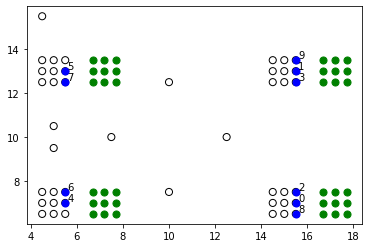

In [62]:
from submodlib import GraphCutFunction
objGC = GraphCutFunction(n=43, mode="dense", separate_rep=True, n_rep=36, data_rep=repData, lambdaVal=0, data=groundData, metric="euclidean")
greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

### Lambda = 1 (Some representation, some diversity)

[(29, 3.427680425811559), (11, 3.3281062920577824), (26, 3.2487187242368236), (8, 3.149144590483047), (36, 2.411258394829929), (23, 1.6799279428087175), (17, 1.515757945831865), (20, 1.1202351681422442), (2, 1.0129851615638472), (39, 0.7378471721895039)]


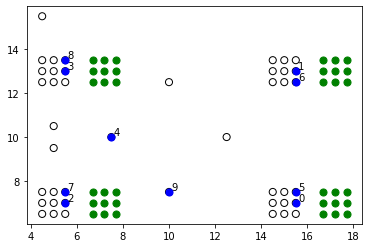

In [63]:
from submodlib import GraphCutFunction
objGC = GraphCutFunction(n=43, mode="dense", separate_rep=True, n_rep=36, data_rep=repData, lambdaVal=1, data=groundData, metric="euclidean")
greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

### Lambda = 5 (Diversity)

[(29, -0.572319574188441), (8, -0.7612876392668113), (11, -1.1375697129406035), (26, -1.3265377780189738), (39, -4.216436206828803), (38, -5.037286191713065), (40, -6.731818729516817), (36, -8.299820107407868), (33, -9.817852161591873), (3, -10.168869799468666)]


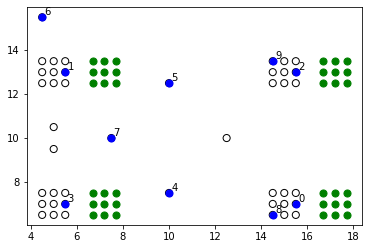

In [64]:
from submodlib import GraphCutFunction
objGC = GraphCutFunction(n=43, mode="dense", separate_rep=True, n_rep=36, data_rep=repData, lambdaVal=5, data=groundData, metric="euclidean")
greedyList = objGC.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

## Selection by Set Cover Function

In [65]:
import numpy as np
import random
from submodlib import SetCoverFunction
num_concepts = 20
num_samples = 15
budget = 4
cover_set = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    cover_set.append(set(random.sample(list(range(num_concepts)), random.randint(0,num_concepts/2))))
    printable = ["\u25A1"]*num_concepts
    #print(''.join(map(str, temp)))
    for ind, val in enumerate(printable):
        if ind in cover_set[i]:
            printable[ind] = "\u25A0"
    #print(i, ": ", ''.join(map(str, printable)))
    printables.append(printable)
    #printable = ["\u25A0" if index in cover_set[i] for index, val in enumerate(temp)]
obj = SetCoverFunction(n=num_samples, cover_set=cover_set, num_concepts=num_concepts)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})", "\u2713")
    else:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})")
print("Greedy Ordered List: ", greedyList)
greedyConcepts = set()
for elem in greedyIndices:
    greedyConcepts = greedyConcepts.union(cover_set[elem])
print("Concepts Covered by Greedy Set: ", greedyConcepts)
greedyPrintable = ["\u25A1"]*num_concepts
for ind, val in enumerate(greedyPrintable):
    if ind in greedyConcepts:
        greedyPrintable[ind] = "\u25A0"
print("Concepts Covered by Greedy Set: ", ''.join(map(str, greedyPrintable)))

[(12, 10.0), (13, 5.0), (5, 3.0), (9, 1.0)]
0 :  □□■□□□□□□□□□□□□□□□■□ (2)
1 :  □□□■□□□□□□□□□□■■□□■□ (4)
2 :  ■□□■□□■□□■□□■■■■□□■■ (10)
3 :  □□□□□□□□□□□□□□□□□□□□ (0)
4 :  ■□□■□□□■■□■□□□■■□□□□ (7)
5 :  ■□□■□□■■■□□■■■□□□■■□ (10) ✓
6 :  □□□□□□□■□□□■■□□■■■■□ (7)
7 :  ■□□■□□□□□□□□□■□□□■□□ (4)
8 :  □□□■□□□□□■□□□□□□□□□□ (2)
9 :  □□□□□□■□□■□□□■□□■□□■ (5) ✓
10 :  □□□□□□□□□□□□■□□■■□■□ (4)
11 :  □■■□□■□■■□■□■■□■□□□□ (9)
12 :  □□■■□■■□■□□■■□■□■□■□ (10) ✓
13 :  ■■■□□□□□□■■□■□□■□□□□ (7) ✓
14 :  □□□□□□□■□□□□□□□□■□□□ (2)
Greedy Ordered List:  [(12, 10.0), (13, 5.0), (5, 3.0), (9, 1.0)]
Concepts Covered by Greedy Set:  {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Concepts Covered by Greedy Set:  ■■■■□■■■■■■■■■■■■■■■


## Selection by Probabilistic Set Cover Function

In [66]:
import numpy as np
import random
from submodlib import ProbabilisticSetCoverFunction
num_concepts = 10
num_samples = 10
budget = 4
probs = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    probs.append([round(num, 2) for num in np.random.rand(num_concepts).tolist()])
obj = ProbabilisticSetCoverFunction(n=num_samples, probs=probs, num_concepts=num_concepts)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", probs[i], "\u2713")
    else:
        print(i, ": ", probs[i])
print("Greedy Ordered List: ", greedyList)
greedyProbs = []
for i in range(num_concepts):
    product = 1
    for elem in greedyIndices:
        product = product * (1-probs[elem][i])
    greedyProbs.append(round(1-product, 2))
print("Probabilities of concepts covered by greedy set: ", greedyProbs)

[(8, 6.439999997615814), (2, 2.167100019538402), (7, 0.9882399646070601), (3, 0.26266774245371505)]
0 :  [0.42, 0.72, 0.0, 0.3, 0.15, 0.09, 0.19, 0.35, 0.4, 0.54]
1 :  [0.42, 0.69, 0.2, 0.88, 0.03, 0.67, 0.42, 0.56, 0.14, 0.2]
2 :  [0.8, 0.97, 0.31, 0.69, 0.88, 0.89, 0.09, 0.04, 0.17, 0.88] ✓
3 :  [0.1, 0.42, 0.96, 0.53, 0.69, 0.32, 0.69, 0.83, 0.02, 0.75] ✓
4 :  [0.99, 0.75, 0.28, 0.79, 0.1, 0.45, 0.91, 0.29, 0.29, 0.13]
5 :  [0.02, 0.68, 0.21, 0.27, 0.49, 0.05, 0.57, 0.15, 0.59, 0.7]
6 :  [0.1, 0.41, 0.69, 0.41, 0.05, 0.54, 0.66, 0.51, 0.94, 0.59]
7 :  [0.9, 0.14, 0.14, 0.81, 0.4, 0.17, 0.93, 0.35, 0.75, 0.73] ✓
8 :  [0.88, 0.62, 0.75, 0.35, 0.27, 0.9, 0.43, 0.96, 0.66, 0.62] ✓
9 :  [0.11, 0.95, 0.45, 0.58, 0.41, 0.24, 0.9, 0.57, 0.0, 0.62]
Greedy Ordered List:  [(8, 6.439999997615814), (2, 2.167100019538402), (7, 0.9882399646070601), (3, 0.26266774245371505)]
Probabilities of concepts covered by greedy set:  [1.0, 0.99, 0.99, 0.98, 0.98, 0.99, 0.99, 1.0, 0.93, 1.0]


## Selection by Disparity Min Function

[(42, 0.0), (35, 0.9963682889938354), (3, -0.025511503219604492), (39, -0.031966447830200195), (40, -0.019958198070526123), (38, -0.018702328205108643), (32, -0.03347498178482056), (37, -0.03746861219406128), (36, -0.10878568887710571), (8, 0.0)]


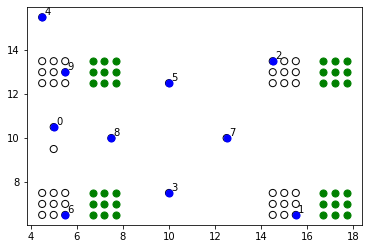

In [67]:
from submodlib import DisparityMinFunction
objDM = DisparityMinFunction(n=43, data=groundData, mode="dense", metric="euclidean")
greedyList = objDM.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

## Selection by LogDeterminant Function

[(42, 0.6931471805599455), (35, 0.6931438832211873), (3, 0.6929232204515701), (40, 0.691494248520986), (39, 0.6913475777987967), (30, 0.6878583983548511), (38, 0.6874666052248034), (37, 0.6729936816170369), (36, 0.658007597766093), (8, 0.6518273889940143)]


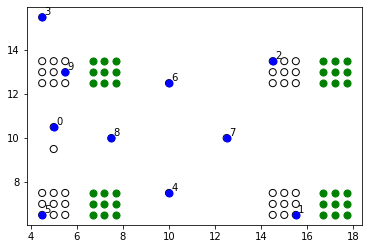

In [68]:
from submodlib import LogDeterminantFunction
objLogDet = LogDeterminantFunction(n=43, data=groundData, mode="dense", metric="euclidean", lambdaVal=1)
greedyList = objLogDet.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
#plt.scatter(groundxs, groundys, s=50, color='grey', label="Images")
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(repxs, repys, s=50, color='green', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

# Submodular Mutual Information Functions

## Hand-crafted Data with Queries

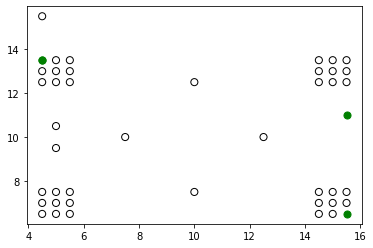

In [1]:
import numpy as np
import matplotlib.pyplot as plt
groundData =np.array( [(5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), 
(7.5,10), (12.5,10), (10,12.5), (10,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]
mutlipleQueryData = np.array([(4.5,13.5), (15.5,6.5)])
multiplequeryxs = [x[0] for x in mutlipleQueryData]
multiplequeryys = [x[1] for x in mutlipleQueryData]

mutlipleQueryData2 = np.array([(4.5,13.5), (15.5,11)])
multiplequeryxs2 = [x[0] for x in mutlipleQueryData2]
multiplequeryys2 = [x[1] for x in mutlipleQueryData2]

singleQueryData = np.array([(4.5,13.5)])
singlequeryxs = [x[0] for x in singleQueryData]
singlequeryys = [x[1] for x in singleQueryData]

plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")

## Selection by FacilityLocationMutualInformation Function (FL1MI)

### Single Query

[(6, 6.347356248181313), (38, 0.08837997913360596), (40, 0.0), (39, 0.0), (37, 0.0), (36, 0.0), (35, 0.0), (34, 0.0), (33, 0.0), (32, 0.0)]
[(6, 7.735530372010544), (0, 0.375171706546098), (5, 0.2994178868830204), (38, 0.15830132365226746), (11, 0.1375643126666546), (1, 0.08004602324217558), (12, 0.021678388118743896), (7, 0.021678388118743896), (40, 0.0), (39, 0.0)]
[(6, 7.767162073869258), (12, 0.673431555274874), (38, 0.38268351554870605), (7, 0.34263821318745613), (11, 0.22345224395394325), (1, 0.22137468168511987), (5, 0.22119921445846558), (0, 0.22119921445846558), (13, 0.12472999352030456), (40, 0.08591309562325478)]
[(6, 7.767162073869258), (40, 0.7412064142990857), (38, 0.5298353433609009), (7, 0.4147988799959421), (12, 0.29781150817871094), (13, 0.2238197443075478), (1, 0.22137468168511987), (11, 0.22119921445846558), (5, 0.22119921445846558), (0, 0.22119921445846558)]
[(6, 7.767162073869258), (39, 1.0757263484410942), (38, 0.6769870519638062), (7, 0.4147988799959421), (12, 0

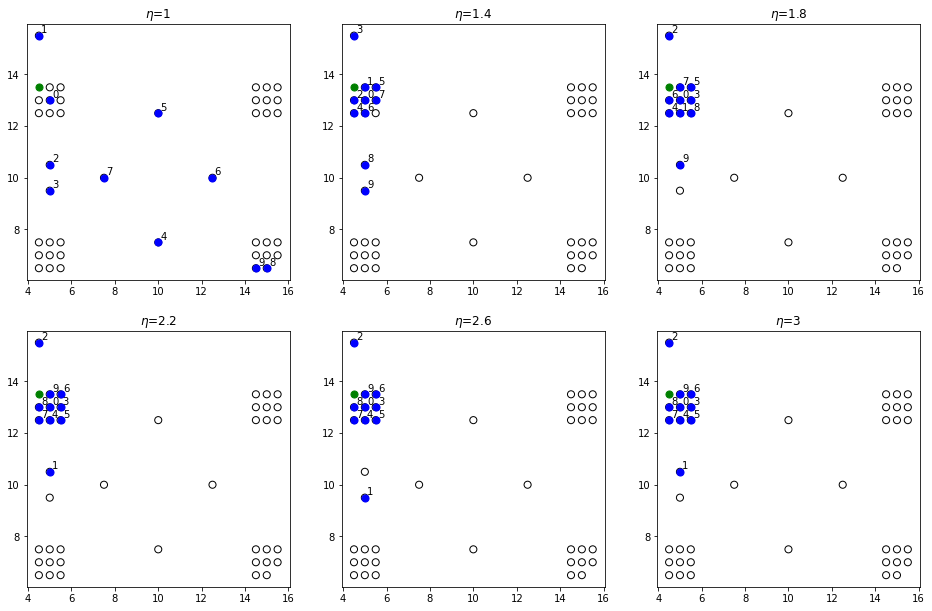

In [4]:
from submodlib import FacilityLocationMutualInformationFunction
etas = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = FacilityLocationMutualInformationFunction(n=41, num_queries=1, data=groundData, 
                                                    queryData=singleQueryData, metric="euclidean", 
                                                    magnificationLambda=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Queries (1)

[(6, 6.380625283811241), (27, 5.492554245516658), (38, 0.08837997913360596), (40, 0.0), (39, 0.0), (37, 0.0), (36, 0.0), (35, 0.0), (34, 0.0), (33, 0.0)]
[(6, 7.736101884860545), (27, 6.739558145403862), (0, 0.3750419318675995), (28, 0.2994178868830204), (5, 0.2994178868830204), (33, 0.29781150817871094), (38, 0.15830132365226746), (11, 0.1375643126666546), (22, 0.10531460866332054), (32, 0.07482782751321793)]
[(6, 7.767162073869258), (27, 6.770618334412575), (12, 0.6636146977543831), (21, 0.5328838303685188), (38, 0.38268351554870605), (26, 0.31967639178037643), (7, 0.31967639178037643), (22, 0.22345224395394325), (11, 0.22345224395394325), (33, 0.22119921445846558)]
[(6, 7.767162073869258), (27, 6.770618334412575), (40, 0.7083341404795647), (21, 0.5328838303685188), (38, 0.5298353433609009), (7, 0.39730583131313324), (35, 0.3200444132089615), (33, 0.29781150817871094), (12, 0.29781150817871094), (32, 0.22119921445846558)]
[(6, 7.767162073869258), (27, 6.770618334412575), (40, 1.02920

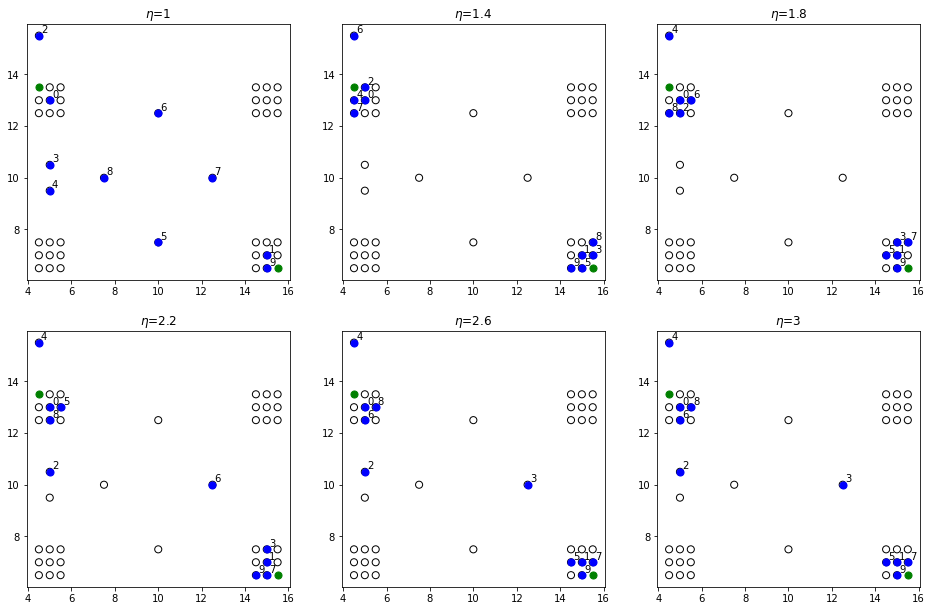

In [5]:
from submodlib import FacilityLocationMutualInformationFunction
etas = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = FacilityLocationMutualInformationFunction(n=41, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData, metric="euclidean", magnificationLambda=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Queries (2)

[(6, 6.380625283811241), (14, 3.8462475277483463), (33, 0.5812758356332779), (38, 0.08837997913360596), (35, 0.004001781344413757), (40, 0.0), (39, 0.0), (37, 0.0), (36, 0.0), (34, 0.0)]
[(6, 7.736101884860545), (15, 5.099689858034253), (20, 1.0705174747854471), (0, 0.3750419318675995), (5, 0.2994178868830204), (38, 0.15830132365226746), (11, 0.1375643126666546), (35, 0.08976659178733826), (1, 0.07034212350845337), (12, 0.021678388118743896)]
[(6, 7.767162073869258), (15, 6.312109874561429), (20, 1.5283051952719688), (12, 0.6625975519418716), (38, 0.38268351554870605), (7, 0.31967639178037643), (11, 0.22345224395394325), (5, 0.22119921445846558), (1, 0.22119921445846558), (0, 0.22119921445846558)]
[(6, 7.767162073869258), (15, 7.094854908064008), (20, 1.9860930666327477), (40, 0.7083341404795647), (38, 0.5298353433609009), (7, 0.3962886855006218), (16, 0.3325713276863098), (12, 0.29781150817871094), (35, 0.2813820317387581), (13, 0.22119921445846558)]
[(6, 7.767162073869258), (9, 7.227

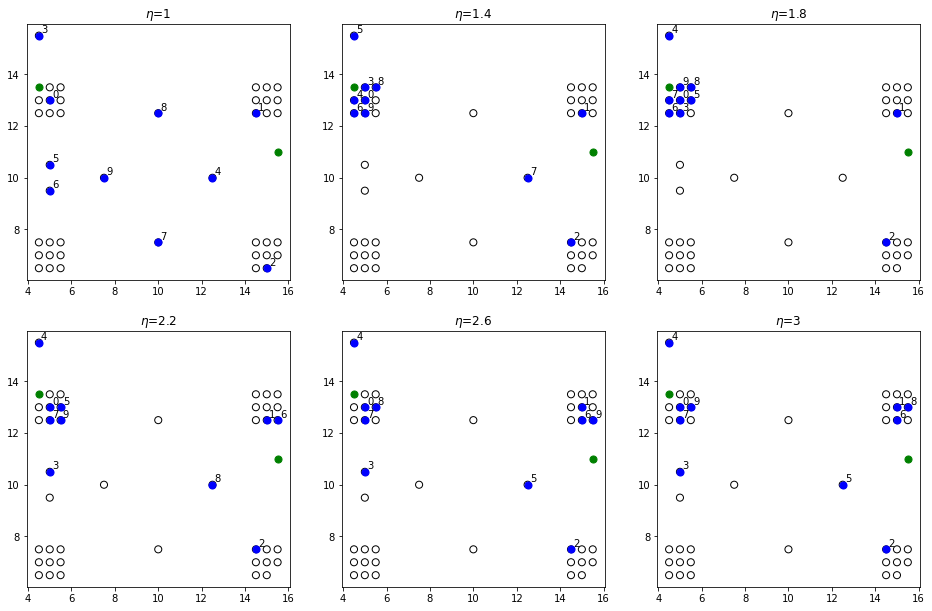

In [72]:
from submodlib import FacilityLocationMutualInformationFunction
etas = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = FacilityLocationMutualInformationFunction(n=41, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData2, metric="euclidean", magnificationLambda=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Selection by FacilityLocationVariantMutualInformation Function (FL2MI)

### Single Query

[(40, 1.1754943508222875e-38), (39, 1.1754943508222875e-38), (38, 1.1754943508222875e-38), (37, 1.1754943508222875e-38), (36, 1.1754943508222875e-38), (35, 1.1754943508222875e-38), (34, 1.1754943508222875e-38), (33, 1.1754943508222875e-38), (32, 1.1754943508222875e-38), (31, 1.1754943508222875e-38)]
[(5, 0.6230406165122986), (0, 0.3115203082561493), (6, 0.28087541460990906), (11, 0.24261227250099182), (1, 0.24261227250099182), (12, 0.22870834171772003), (7, 0.22870834171772003), (13, 0.19722747802734375), (38, 0.14715178310871124), (40, 0.08742435276508331)]
[(5, 1.2460812330245972), (0, 0.6230406165122986), (6, 0.5617508292198181), (11, 0.48522454500198364), (1, 0.48522454500198364), (12, 0.45741668343544006), (7, 0.45741668343544006), (13, 0.3944549560546875), (38, 0.2943035662174225), (40, 0.17484870553016663)]
[(5, 1.5576015710830688), (0, 0.7788007855415344), (6, 0.7021884918212891), (11, 0.6065306663513184), (1, 0.6065306663513184), (12, 0.5717708468437195), (7, 0.571770846843719

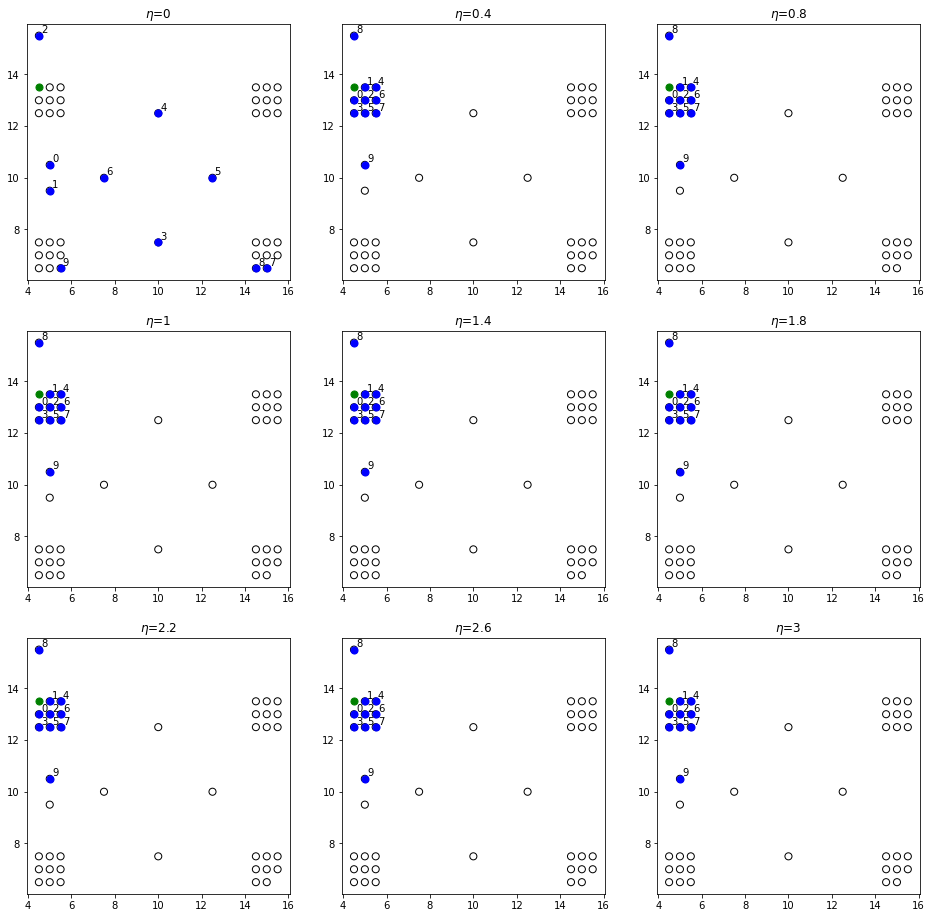

In [73]:
from submodlib import FacilityLocationVariantMutualInformationFunction
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = FacilityLocationVariantMutualInformationFunction(n=41, num_queries=1, data=groundData, 
                                                    queryData=singleQueryData, metric="euclidean", magnificationLambda=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Queries (1)

[(40, 1.1754943508222875e-38), (39, 1.1754943508222875e-38), (38, 1.1754943508222875e-38), (37, 1.1754943508222875e-38), (36, 1.1754943508222875e-38), (35, 1.1754943508222875e-38), (34, 1.1754943508222875e-38), (33, 1.1754943508222875e-38), (32, 1.1754943508222875e-38), (31, 1.1754943508222875e-38)]
[(33, 0.6237680372432806), (5, 0.6223132014274597), (28, 0.3115203082561493), (0, 0.3115203082561493), (27, 0.28087541460990906), (6, 0.28087541460990906), (32, 0.24261227250099182), (22, 0.24261227250099182), (11, 0.24261227250099182), (1, 0.24261227250099182)]
[(33, 1.2475360744865611), (5, 1.2446264028549194), (28, 0.6230406165122986), (0, 0.6230406165122986), (27, 0.5617508292198181), (6, 0.5617508292198181), (32, 0.48522454500198364), (22, 0.48522454500198364), (11, 0.48522454500198364), (1, 0.48522454500198364)]
[(33, 1.55942012288142), (5, 1.5557830333709717), (28, 0.7788007855415344), (0, 0.7788007855415344), (27, 0.7021884918212891), (6, 0.7021884918212891), (32, 0.6065306663513184

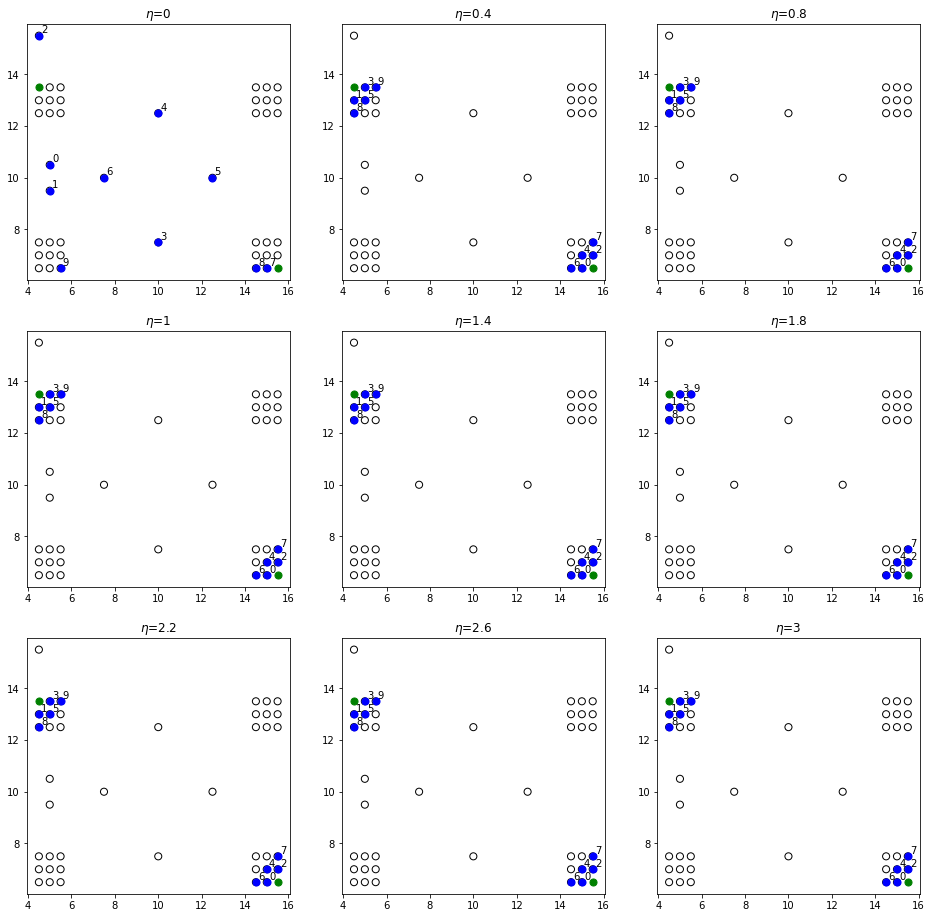

In [74]:
from submodlib import FacilityLocationVariantMutualInformationFunction
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = FacilityLocationVariantMutualInformationFunction(n=41, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData, metric="euclidean", magnificationLambda=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Queries (2)

[(40, 1.1754943508222875e-38), (39, 1.1754943508222875e-38), (38, 1.1754943508222875e-38), (37, 1.1754943508222875e-38), (36, 1.1754943508222875e-38), (35, 1.1754943508222875e-38), (34, 1.1754943508222875e-38), (33, 1.1754943508222875e-38), (32, 1.1754943508222875e-38), (31, 1.1754943508222875e-38)]
[(0, 0.6248531154124066), (16, 0.3760807365179062), (5, 0.3115203082561493), (6, 0.28087541460990906), (11, 0.24261227250099182), (1, 0.24261227250099182), (12, 0.22870834171772003), (7, 0.22870834171772003), (13, 0.19722747802734375), (15, 0.18143457174301147)]
[(0, 1.2497062308248132), (16, 0.7521614730358124), (5, 0.6230406165122986), (6, 0.5617508292198181), (11, 0.48522454500198364), (1, 0.48522454500198364), (12, 0.45741668343544006), (7, 0.45741668343544006), (13, 0.3944549560546875), (15, 0.36286914348602295)]
[(0, 1.562132818158716), (16, 0.9402018487453461), (5, 0.7788007855415344), (6, 0.7021884918212891), (11, 0.6065306663513184), (1, 0.6065306663513184), (12, 0.5717708468437195

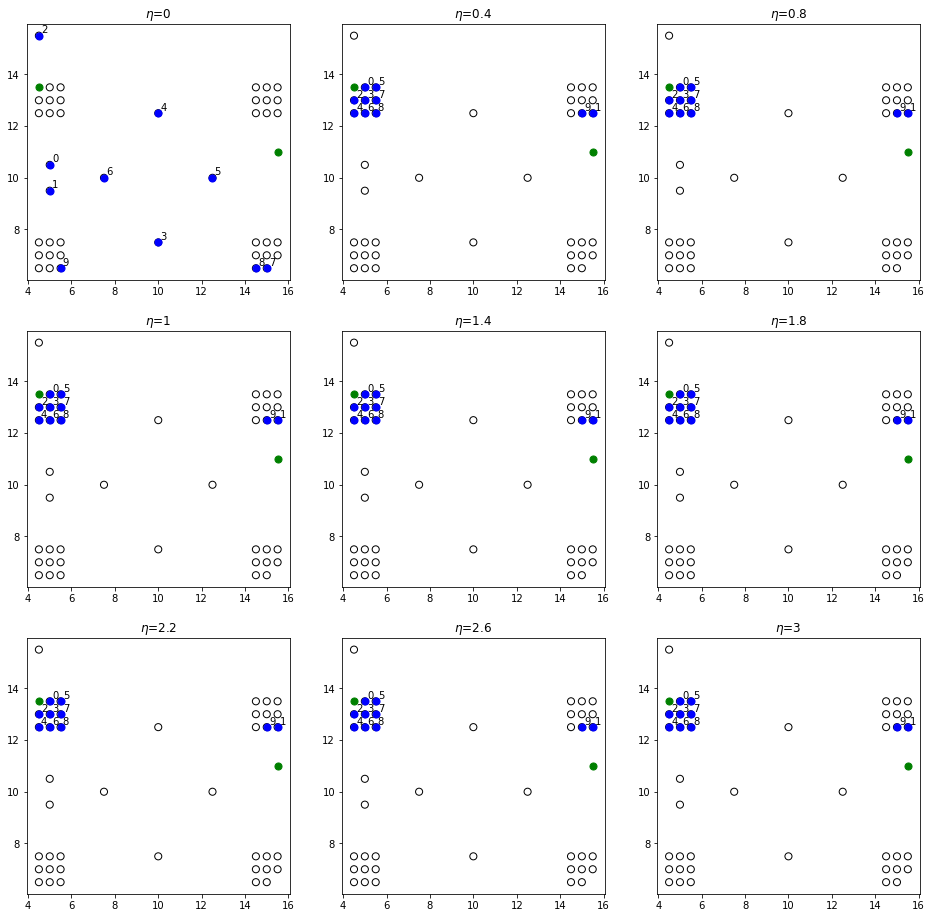

In [75]:
from submodlib import FacilityLocationVariantMutualInformationFunction
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = FacilityLocationVariantMutualInformationFunction(n=41, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData2, metric="euclidean", magnificationLambda=eta)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Selection by ConcaveOverModular Function (COM) Logarithmic

### Single Query

[(5, 0.5759394212674923), (0, 0.3631305117760252), (6, 0.2425928623793674), (11, 0.17064054344714408), (1, 0.14572276249515403), (12, 0.12029667202556604), (7, 0.10736688541574257), (13, 0.08414902283140213), (38, 0.05847144123935544), (40, 0.033185590899913464)]
[(5, 0.8063151932073557), (0, 0.5935062837158885), (6, 0.45535877405791036), (11, 0.36027134159783025), (1, 0.33535356064584043), (12, 0.3011778393822535), (7, 0.28824805277243004), (13, 0.24448243679288284), (38, 0.18377612078943262), (40, 0.11225381262202516)]
[(5, 1.0366909651472191), (0, 0.8238820556557519), (6, 0.6681246857364531), (11, 0.5499021397485166), (1, 0.5249843587965266), (12, 0.48205900673894075), (7, 0.4691292201291175), (13, 0.40481585075436355), (38, 0.3090808003395096), (40, 0.19132203434413664)]
[(5, 1.1518788425349846), (0, 0.9390699330435176), (6, 0.7745076336495769), (11, 0.6447175317595621), (1, 0.6197997508075721), (12, 0.5724995836789362), (7, 0.5595697970691125), (13, 0.4849825517622186), (38, 0.371

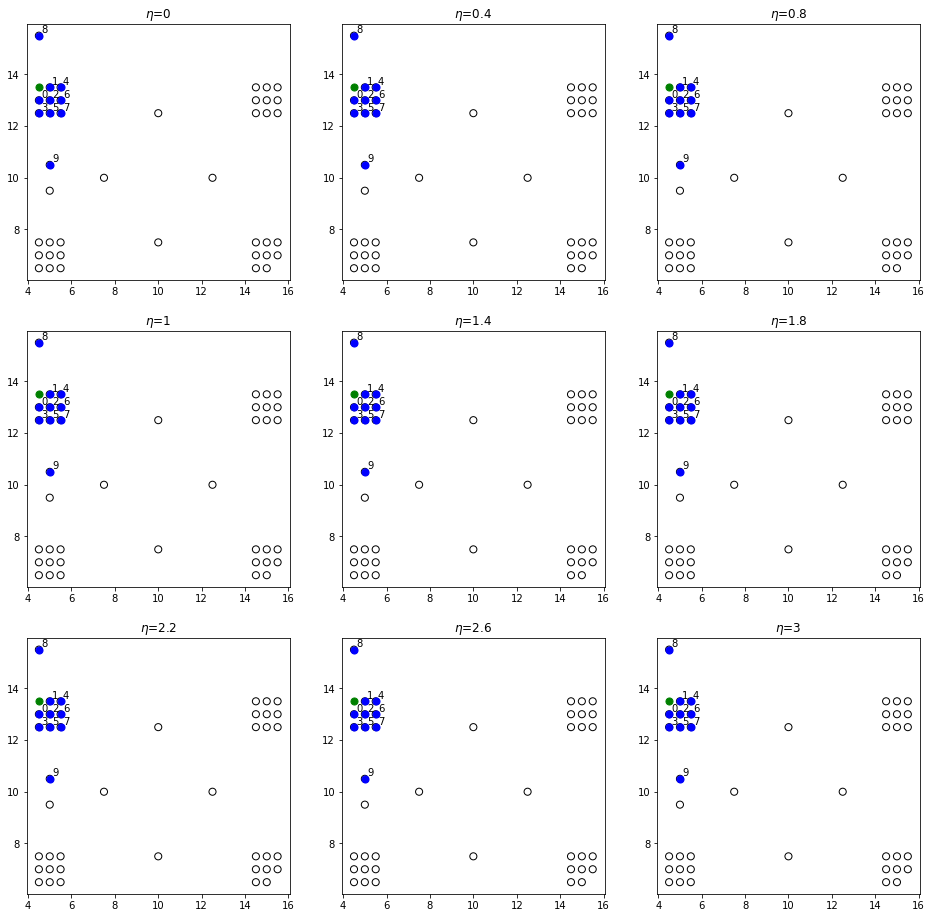

In [76]:
from submodlib import ConcaveOverModularFunction
from submodlib_cpp import ConcaveOverModular
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = ConcaveOverModularFunction(n=41, num_queries=1, data=groundData, 
                                                    queryData=singleQueryData, 
                                     metric="euclidean", magnificationLambda=eta, mode=ConcaveOverModular.logarithmic)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1


### Multiple Queries (1)

[(33, 0.577756321502521), (0, 0.5761661707212362), (28, 0.3637629861735572), (5, 0.3631889746931549), (27, 0.2431109984009321), (6, 0.24276144302800828), (32, 0.17105676034042183), (1, 0.17084240609772428), (22, 0.14593988813757752), (11, 0.14580705114332249)]
[(33, 0.8085408233862295), (0, 0.8069506726049447), (28, 0.5945165493570719), (5, 0.5939425378766696), (27, 0.45636580598806176), (6, 0.45601625061513795), (32, 0.361243781771174), (1, 0.36102942752847644), (22, 0.3360439103710484), (11, 0.3359110733767934)]
[(33, 1.039325325269938), (0, 1.0377351744886532), (28, 0.8252701125405866), (5, 0.8246961010601845), (27, 0.6696206135751914), (6, 0.6692710582022676), (32, 0.5514308032019262), (1, 0.5512164489592286), (22, 0.5261479326045193), (11, 0.5260150956102643)]
[(33, 1.1547175676143997), (0, 1.1531274168331147), (28, 0.9406468855361043), (5, 0.9400728740557018), (27, 0.7762480094243955), (6, 0.7758984540514717), (32, 0.6465243068322839), (1, 0.6463099525895863), (22, 0.621199936639

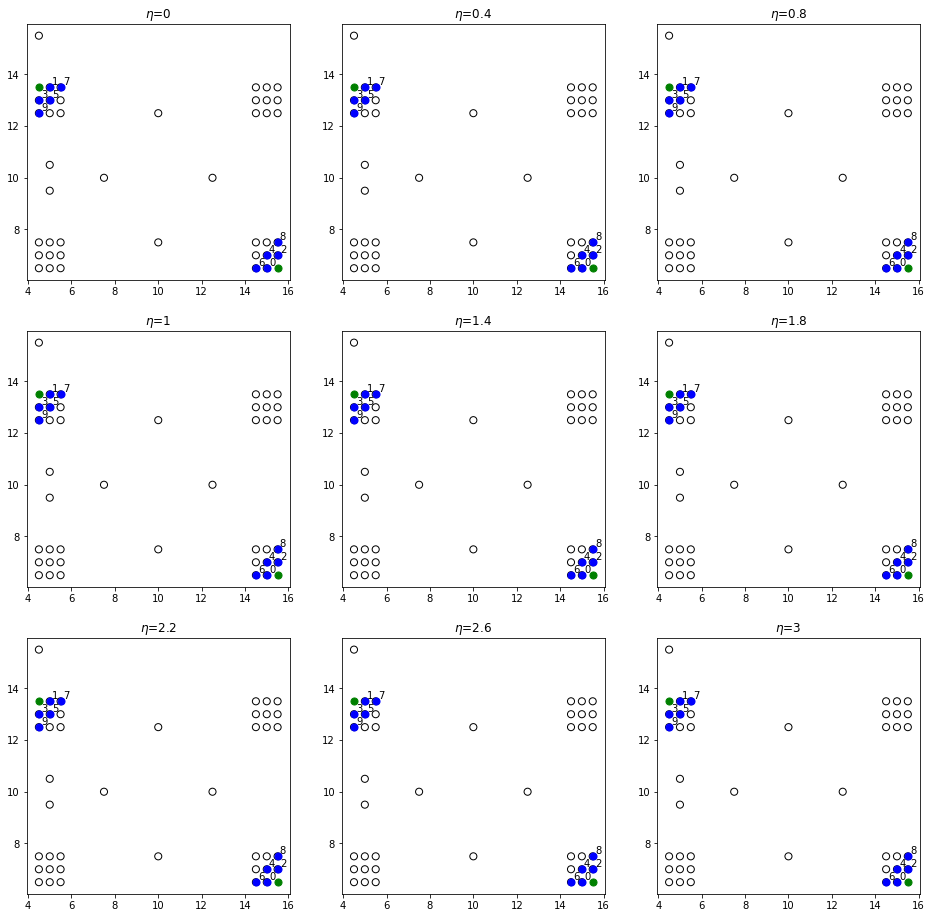

In [77]:
from submodlib import ConcaveOverModularFunction
from submodlib_cpp import ConcaveOverModular
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = ConcaveOverModularFunction(n=41, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData, 
                                     metric="euclidean", magnificationLambda=eta, mode=ConcaveOverModular.logarithmic)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1


### Multiple Queries (2)

[(0, 0.5804604331502541), (16, 0.3876662346514045), (5, 0.36497325248268775), (15, 0.26923272526242537), (6, 0.24429281521958357), (14, 0.19212451837953637), (1, 0.17234921983041884), (11, 0.14682533196288539), (10, 0.1460736375141498), (9, 0.12428770263371547)]
[(0, 0.8118538537446833), (5, 0.5980558138762424), (16, 0.5416306138111042), (6, 0.45936293740657175), (15, 0.41907020105726933), (1, 0.36424430252017403), (11, 0.33799542937373905), (14, 0.32888909822930357), (7, 0.30492001614569064), (12, 0.2913016591785951)]
[(0, 1.0432472743391124), (5, 0.8292704608315205), (16, 0.6974629074090808), (6, 0.6732493316212484), (15, 0.570091404824425), (1, 0.5553108835465337), (11, 0.5285921024304141), (7, 0.48805538507236923), (12, 0.4740156626192391), (14, 0.4657827674713073)]
[(0, 1.1589439760162505), (5, 0.9448777756957425), (6, 0.7820333836147617), (16, 0.7735381855487997), (1, 0.6519965254550344), (15, 0.6444496425689188), (11, 0.6238904318584719), (7, 0.5792709999173677), (12, 0.56508830

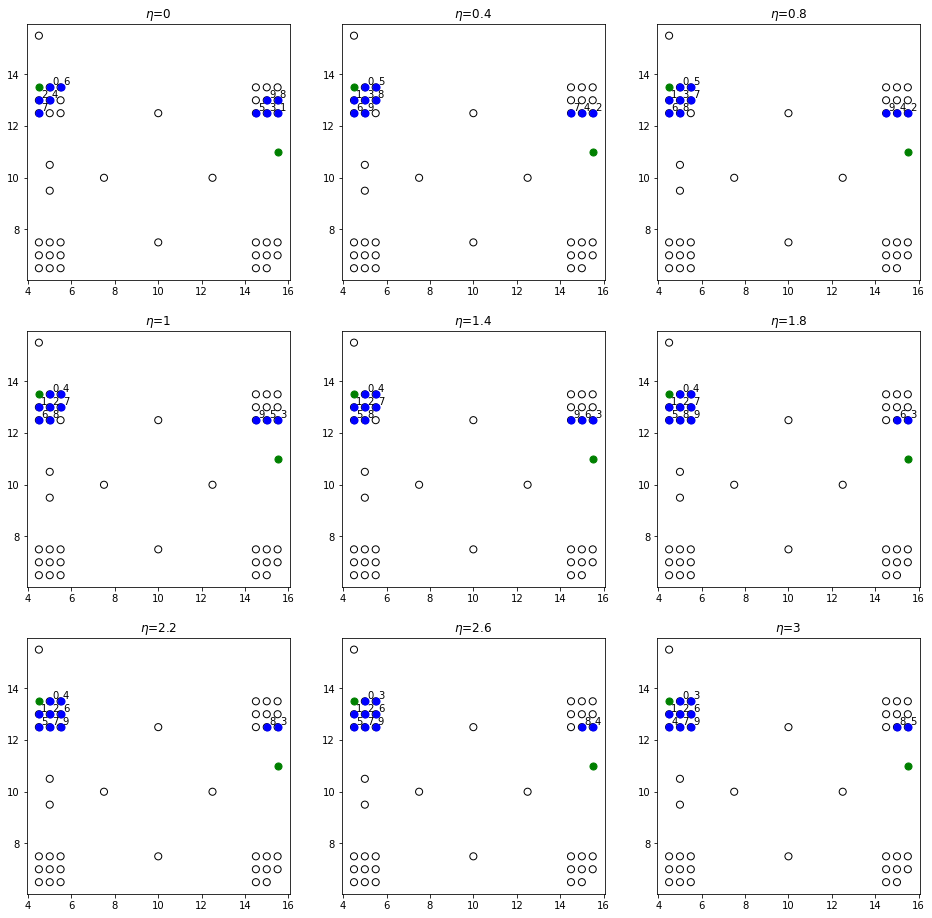

In [78]:
from submodlib import ConcaveOverModularFunction
from submodlib_cpp import ConcaveOverModular
etas = [0, 0.4, 0.8, 1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = ConcaveOverModularFunction(n=41, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData2, 
                                     metric="euclidean", magnificationLambda=eta, mode=ConcaveOverModular.logarithmic)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1


## Selection by GraphCutMutualInformation Function (GCMI)

### Single Query

[(5, 0.7788007855415344), (0, 0.7788007855415344), (6, 0.7021884918212891), (11, 0.6065306663513184), (1, 0.6065306663513184), (12, 0.5717708468437195), (7, 0.5717708468437195), (13, 0.4930686950683594), (38, 0.3678794503211975), (40, 0.21856087446212769)]


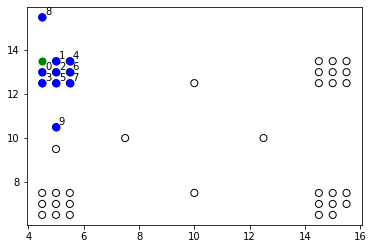

In [2]:
from submodlib import GraphCutMutualInformationFunction
obj = GraphCutMutualInformationFunction(n=41, num_queries=1, data=groundData, 
                                        queryData=singleQueryData, 
                                        metric="euclidean")
greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

### Multiple Queries (1)

[(33, 0.7806193373398855), (0, 0.7806193373398855), (28, 0.780481617548503), (5, 0.780481617548503), (27, 0.7042702462058514), (6, 0.7042702462058514), (32, 0.6087661946658045), (1, 0.6087661946658045), (22, 0.6084324135445058), (11, 0.6084324135445058)]


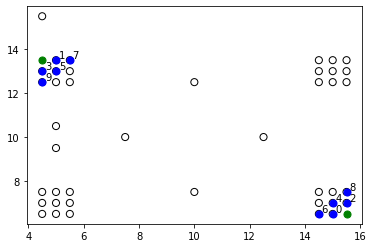

In [4]:
from submodlib import GraphCutMutualInformationFunction
obj = GraphCutMutualInformationFunction(n=41, num_queries=2, data=groundData, 
                                        queryData=mutlipleQueryData, 
                                        metric="euclidean")
greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))

### Multiple Queries (2)

[(0, 0.7833320326171815), (5, 0.7825351788196713), (6, 0.7069633575156331), (1, 0.6123076011426747), (11, 0.6104146228171885), (7, 0.5778735741041601), (12, 0.5767459915950894), (13, 0.499440087005496), (16, 0.4763616672717035), (15, 0.458710758946836)]


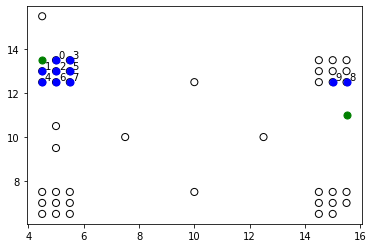

In [5]:
from submodlib import GraphCutMutualInformationFunction
obj = GraphCutMutualInformationFunction(n=41, num_queries=2, data=groundData, 
                                        queryData=mutlipleQueryData2, 
                                        metric="euclidean")
greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
print(greedyList)
greedyXs = [groundxs[x[0]] for x in greedyList]
greedyYs = [groundys[x[0]] for x in greedyList]
plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))


## Selection by LogDeterminantMutualInformation Function (LogDetMI)

### Single Query

[(5, 0.16444155996783572), (0, 0.08975293399186152), (6, 0.02702429774150278), (11, 0.01162402594589812), (1, 0.010238415559837899), (38, 0.007869386527057154), (12, 0.002612513630384339), (7, 0.0018469229589687108), (13, 0.0002713845112766733), (40, 4.498184919510262e-05)]
[(5, 0.3526829307056123), (0, 0.2270279103778708), (6, 0.07511637856882519), (11, 0.03346521546074355), (1, 0.03009734587269325), (38, 0.023548261901987777), (12, 0.007900186430376432), (7, 0.00561039561061083), (13, 0.0008261677681134505), (40, 0.00013698096907199808)]
[(5, 0.6758768335024249), (0, 0.6233129647108717), (6, 0.28187129901866464), (1, 0.1477702351953042), (11, 0.14935754854352928), (38, 0.13090438232922985), (12, 0.04728878440869583), (7, 0.03475474225751907), (13, 0.005204631934243531), (40, 0.0008651488030364529)]
[(5, 1.3238910421054317), (6, 1.91718235303609), (13, 2.344412738601984), (40, 1.3603439626446288), (39, 0.3780360228099932), (36, 0.5659845580614524), (34, 0.3395276419698188), (17, 0.063

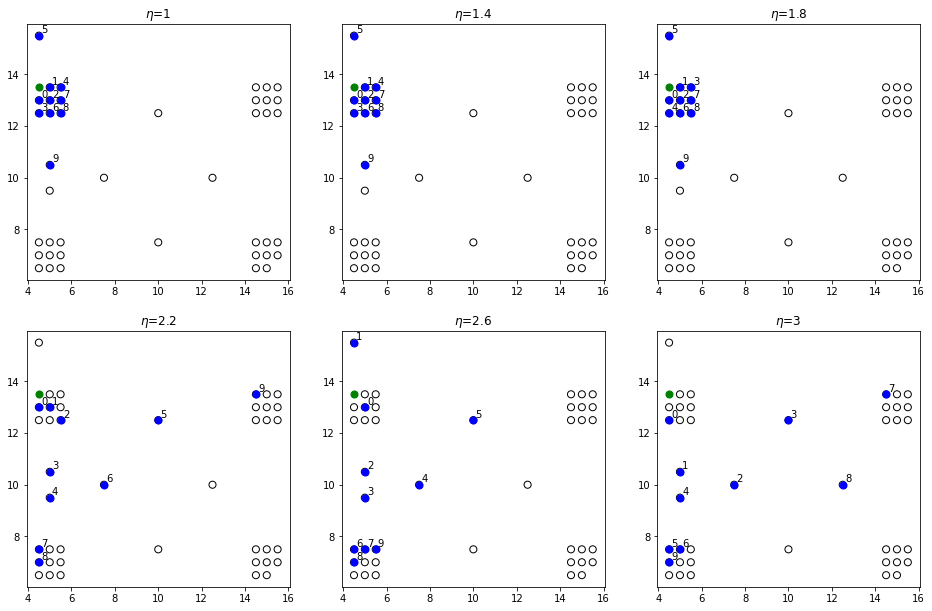

In [15]:
from submodlib import LogDeterminantMutualInformationFunction
etas = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = LogDeterminantMutualInformationFunction(n=41, num_queries=1, data=groundData, 
                                                    queryData=singleQueryData, metric="euclidean", 
                                                    magnificationLambda=eta, lambdaVal=1)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Queries (1)

[(33, 0.16444201618251364), (5, 0.1644411460595866), (28, 0.08975287979226981), (0, 0.0897527043412043), (6, 0.027024252477596544), (27, 0.027024198319737958), (22, 0.01162399822378124), (11, 0.01162398842775475), (32, 0.010238388648292462), (1, 0.010238376037689512)]
[(33, 0.3526840100938898), (0, 0.3526827659700145), (28, 0.2270281581974019), (5, 0.2270280128078423), (27, 0.07511657815982897), (6, 0.07511639015995358), (1, 0.03346530018916399), (22, 0.033465200992256416), (11, 0.03009742192413345), (32, 0.030097331022219342)]
[(0, 0.6758792985665993), (33, 0.6758806116987547), (28, 0.6233205311166798), (5, 0.6233281626699422), (6, 0.2818845042278015), (27, 0.28188784408778345), (1, 0.1477823146787699), (11, 0.14937115660135508), (32, 0.14778429764646078), (22, 0.14937433850440313)]
[(33, 1.3238980818778754), (27, 1.9172604491964669), (20, 2.345645255249183), (0, 1.3289469614294003), (6, 1.9597521308262844), (13, 3.0453842521630445), (34, 0.3352958408289662), (35, 0.4112709963945888),

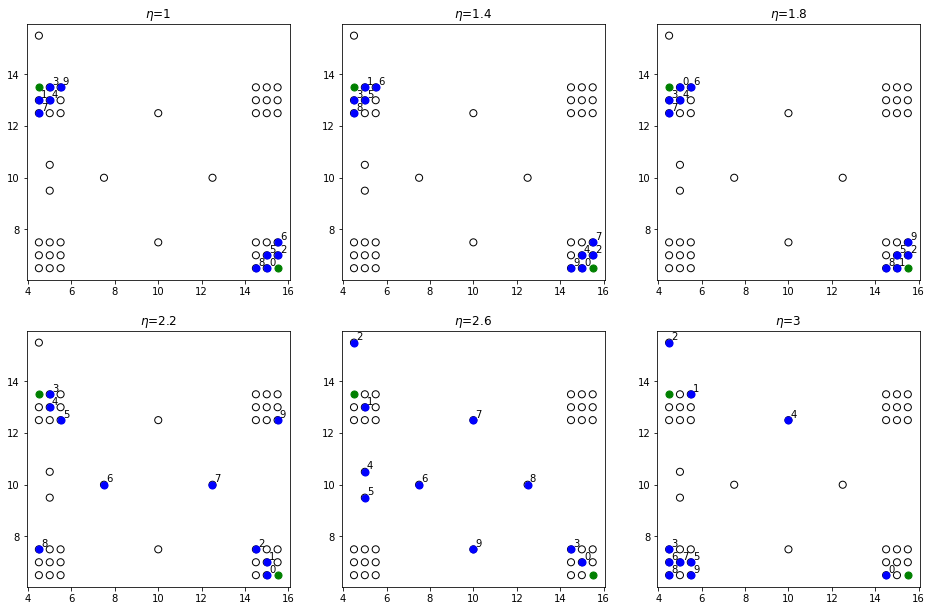

In [16]:
from submodlib import LogDeterminantMutualInformationFunction
etas = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = LogDeterminantMutualInformationFunction(n=41, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData, 
                                                  metric="euclidean", magnificationLambda=eta, lambdaVal=1)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Queries (2)

[(0, 0.16444448047987914), (5, 0.08975374364640143), (16, 0.05739642632257613), (6, 0.027024949268465215), (15, 0.02295197884394884), (1, 0.011624700371953622), (14, 0.010330499697655315), (11, 0.010238434832422483), (38, 0.00786931162808402), (22, 0.005593422708734419)]
[(0, 0.3526898405471068), (5, 0.22703103237727956), (16, 0.11578314549943236), (6, 0.07511923577573287), (15, 0.048296566744776004), (1, 0.03346780846150049), (11, 0.030098272041286678), (38, 0.0235486880807394), (14, 0.022146424488231564), (22, 0.012101727280307784)]
[(0, 0.6758926139861019), (5, 0.6233308185936357), (6, 0.2818972232823496), (16, 0.19936271808287398), (1, 0.14780125189134796), (11, 0.14937981658714639), (38, 0.13092545735396433), (15, 0.08855117050041789), (12, 0.04730421266511681), (14, 0.04185141050249852)]
[(0, 1.3239361088342911), (6, 1.9176243964410795), (13, 2.3510931372854396), (39, 0.6760600677877668), (16, 0.3242473344176539), (15, 0.16031566505874484), (34, 0.136321945211495), (36, 0.0949932

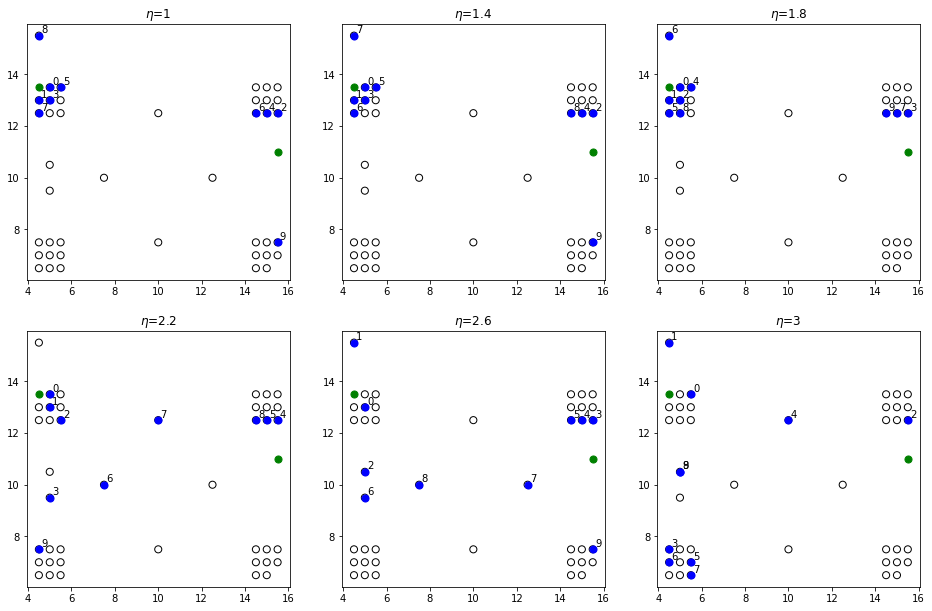

In [17]:
from submodlib import LogDeterminantMutualInformationFunction
etas = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    plt.subplot(3,3,row*3+index)
    obj = LogDeterminantMutualInformationFunction(n=41, num_queries=2, data=groundData, 
                                                    queryData=mutlipleQueryData2, 
                                                  metric="euclidean", magnificationLambda=eta, lambdaVal=1)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='green', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\eta$='+str(eta))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Selection by SetCover Mutual Information Function

In [3]:
import numpy as np
import random
from submodlib import SetCoverMutualInformationFunction
num_concepts = 20
num_samples = 15
budget = 4
cover_set = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    cover_set.append(set(random.sample(list(range(num_concepts)), random.randint(0,num_concepts/2))))
    printable = ["\u25A1"]*num_concepts
    #print(''.join(map(str, temp)))
    for ind, val in enumerate(printable):
        if ind in cover_set[i]:
            printable[ind] = "\u25A0"
    #print(i, ": ", ''.join(map(str, printable)))
    printables.append(printable)
    #printable = ["\u25A0" if index in cover_set[i] for index, val in enumerate(temp)]
queries = set(random.sample(range(num_concepts),2))
print("Query set: ", queries)
obj = SetCoverMutualInformationFunction(n=num_samples, cover_set=cover_set, 
                                        num_concepts=num_concepts, query_concepts=queries)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})", "\u2713")
    else:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})")
print("Greedy Ordered List: ", greedyList)
greedyConcepts = set()
for elem in greedyIndices:
    greedyConcepts = greedyConcepts.union(cover_set[elem])
print("Concepts Covered by Greedy Set: ", greedyConcepts)
greedyPrintable = ["\u25A1"]*num_concepts
for ind, val in enumerate(greedyPrintable):
    if ind in greedyConcepts:
        greedyPrintable[ind] = "\u25A0"
print("Concepts Covered by Greedy Set: ", ''.join(map(str, greedyPrintable)))

Query set:  {0, 6}
0 :  □□■□□□□□□□□□□□□□□□■□ (2)
1 :  □□□■□□□□□□□□□□■■□□■□ (4)
2 :  ■□□■□□■□□■□□■■■■□□■■ (10)
3 :  □□□□□□□□□□□□□□□□□□□□ (0)
4 :  ■□□■□□□■■□■□□□■■□□□□ (7)
5 :  ■□□■□□■■■□□■■■□□□■■□ (10) ✓
6 :  □□□□□□□■□□□■■□□■■■■□ (7)
7 :  ■□□■□□□□□□□□□■□□□■□□ (4)
8 :  □□□■□□□□□■□□□□□□□□□□ (2)
9 :  □□□□□□■□□■□□□■□□■□□■ (5)
10 :  □□□□□□□□□□□□■□□■■□■□ (4)
11 :  □■■□□■□■■□■□■■□■□□□□ (9)
12 :  □□■■□■■□■□□■■□■□■□■□ (10) ✓
13 :  ■■■□□□□□□■■□■□□■□□□□ (7) ✓
14 :  □□□□□□□■□□□□□□□□■□□□ (2) ✓
Greedy Ordered List:  [(5, 2.0), (14, 0.0), (13, 0.0), (12, 0.0)]
Concepts Covered by Greedy Set:  {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
Concepts Covered by Greedy Set:  ■■■■□■■■■■■■■■■■■■■□


## Selection by ProbabilisticSetCover Mutual Information Function

In [1]:
import numpy as np
import random
from submodlib import ProbabilisticSetCoverMutualInformationFunction
num_concepts = 10
num_samples = 10
budget = 4
probs = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    probs.append([round(num, 2) for num in np.random.rand(num_concepts).tolist()])
queries = set(random.sample(range(num_concepts),2))
print("Query concepts: ", queries)
obj = ProbabilisticSetCoverMutualInformationFunction(n=num_samples, probs=probs, 
                                                   num_concepts=num_concepts, query_concepts=queries)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", probs[i], "\u2713")
    else:
        print(i, ": ", probs[i])
print("Greedy Ordered List: ", greedyList)
greedyProbs = []
for i in range(num_concepts):
    product = 1
    for elem in greedyIndices:
        product = product * (1-probs[elem][i])
    greedyProbs.append(round(1-product, 2))
print("Probabilities of concepts covered by greedy set: ", greedyProbs)

Query concepts:  {1, 2}
0 :  [0.42, 0.72, 0.0, 0.3, 0.15, 0.09, 0.19, 0.35, 0.4, 0.54]
1 :  [0.42, 0.69, 0.2, 0.88, 0.03, 0.67, 0.42, 0.56, 0.14, 0.2]
2 :  [0.8, 0.97, 0.31, 0.69, 0.88, 0.89, 0.09, 0.04, 0.17, 0.88] ✓
3 :  [0.1, 0.42, 0.96, 0.53, 0.69, 0.32, 0.69, 0.83, 0.02, 0.75] ✓
4 :  [0.99, 0.75, 0.28, 0.79, 0.1, 0.45, 0.91, 0.29, 0.29, 0.13]
5 :  [0.02, 0.68, 0.21, 0.27, 0.49, 0.05, 0.57, 0.15, 0.59, 0.7]
6 :  [0.1, 0.41, 0.69, 0.41, 0.05, 0.54, 0.66, 0.51, 0.94, 0.59]
7 :  [0.9, 0.14, 0.14, 0.81, 0.4, 0.17, 0.93, 0.35, 0.75, 0.73]
8 :  [0.88, 0.62, 0.75, 0.35, 0.27, 0.9, 0.43, 0.96, 0.66, 0.62] ✓
9 :  [0.11, 0.95, 0.45, 0.58, 0.41, 0.24, 0.9, 0.57, 0.0, 0.62] ✓
Greedy Ordered List:  [(9, 1.399999976158142), (3, 0.5490000039935108), (2, 0.03495001347661105), (8, 0.011924405973064855)]
Probabilities of concepts covered by greedy set:  [0.98, 1.0, 1.0, 0.96, 0.98, 0.99, 0.98, 1.0, 0.72, 1.0]


# Conditional Gain Functions

## Selection by GraphCutConditionalGain Functions (GCCG)

### Single Private

[(24, 7.085665142396465), (9, 6.687043386744335), (27, 5.922117287525907), (12, 5.410591304302216), (18, 5.18102560332045), (15, 4.704662167467177), (21, 4.016633784631267), (7, 3.6856096643023193), (25, 3.4798555481247604), (3, 3.1338890806073323)]
[(24, 7.0549421741161495), (9, 6.682870271848515), (27, 5.920451883925125), (18, 5.30577796837315), (12, 4.7890046536922455), (15, 4.700562704354525), (21, 4.01474124728702), (25, 3.549574005883187), (3, 3.146881065913476), (7, 3.1114288768731058)]
[(24, 7.024219205835834), (9, 6.678697156952694), (27, 5.918786480790004), (18, 5.266360343899578), (15, 4.709939135238528), (13, 4.347017785068601), (21, 4.010988059220836), (25, 3.518276627641171), (3, 3.1389718434074894), (12, 2.6134838587604463)]
[(24, 6.993496230104938), (9, 6.674524042056873), (27, 5.917121076723561), (18, 5.226942719426006), (15, 4.705839669331908), (21, 4.018424959620461), (13, 3.9432333917357028), (25, 3.4884209292940795), (3, 3.134773828671314), (26, 2.4711814248003066)

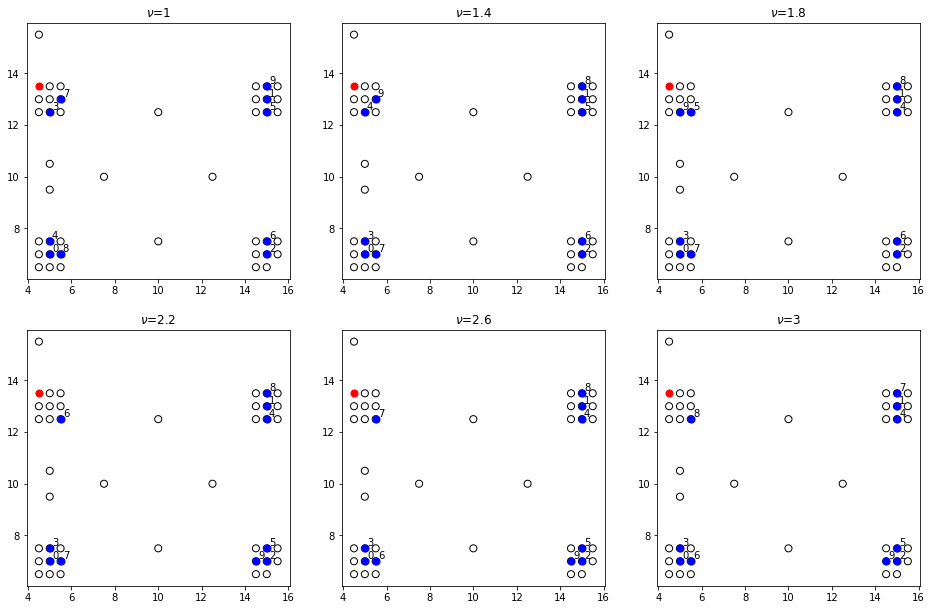

In [6]:
from submodlib import GraphCutConditionalGainFunction

nus = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(3,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=41, 
                                          num_privates=1, 
                                          lambdaVal=1, 
                                          data=groundData,
                                          privateData=singleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (1)

[(24, 7.075232355156913), (9, 6.6102359623182565), (12, 5.41250953823328), (18, 5.184168926905841), (15, 4.7339738151058555), (21, 4.430693707661703), (7, 3.6877308767288923), (25, 3.4837669520638883), (3, 3.151578874909319), (26, 2.884435182902962)]
[(24, 7.040336271980777), (9, 6.5753398791421205), (18, 5.304821833502501), (12, 4.789030320942402), (15, 4.690456724725664), (21, 3.9713844873476774), (25, 3.5481286137364805), (3, 3.140627421089448), (7, 3.1114932522177696), (26, 2.424961692187935)]
[(24, 7.005440196255222), (9, 6.540443803416565), (18, 5.26130475057289), (15, 4.660415535792708), (13, 4.344717886764556), (20, 3.5683805459411815), (25, 3.5066000814549625), (3, 3.109804809675552), (12, 2.6097561893984675), (23, 2.043736341991462)]
[(24, 6.970544090727344), (9, 6.505547697888687), (18, 5.217787652742118), (15, 4.616898437961936), (13, 3.9479145077057183), (25, 3.493451952468604), (3, 3.1802074244478717), (20, 3.0509687402518466), (40, 2.2785117723979056), (29, 1.81614180770

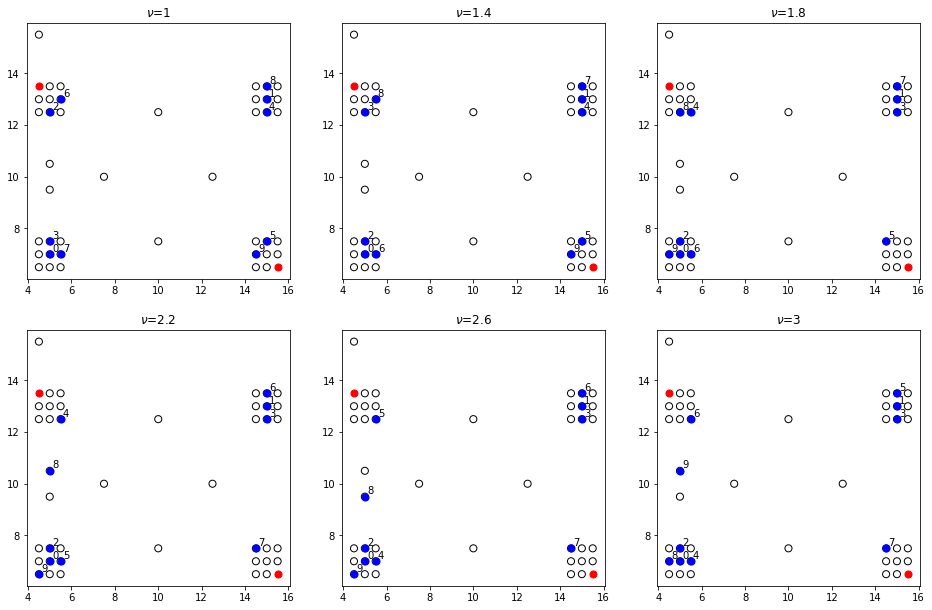

In [8]:
from submodlib import GraphCutConditionalGainFunction

nus = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(3,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=41, 
                                          num_privates=2, 
                                          lambdaVal=1, 
                                          data=groundData,
                                          privateData=mutlipleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (2)

[(24, 7.078401720384136), (9, 5.973583604441956), (27, 5.655626952415332), (12, 5.400641024112701), (18, 5.173125179018825), (8, 3.9917869172059), (26, 3.7550634727813303), (7, 3.667684987653047), (25, 3.4649681826122105), (10, 2.4483271437929943)]
[(24, 7.044773383298889), (9, 5.684026624308899), (27, 5.547365426784381), (18, 5.294717387761921), (12, 4.77507421374321), (26, 3.750775767955929), (8, 3.6253185025416315), (25, 3.5310193677432835), (7, 3.10581210302189), (3, 2.1785435989731923)]
[(24, 7.011145046213642), (27, 5.5386780051048845), (9, 5.294895391212776), (18, 5.2521395846270025), (13, 4.341384235303849), (26, 3.644932351540774), (25, 3.50501297833398), (3, 3.3686018070438877), (12, 2.608250768855214), (23, 2.0427780501777306)]
[(24, 6.977516701677814), (27, 5.430416449671611), (18, 5.21621131291613), (9, 4.9986887604463845), (13, 3.9418320092372596), (26, 3.5410705129615963), (25, 3.471490014810115), (3, 3.140804179594852), (40, 2.274802672211081), (21, 1.890170763945207)]


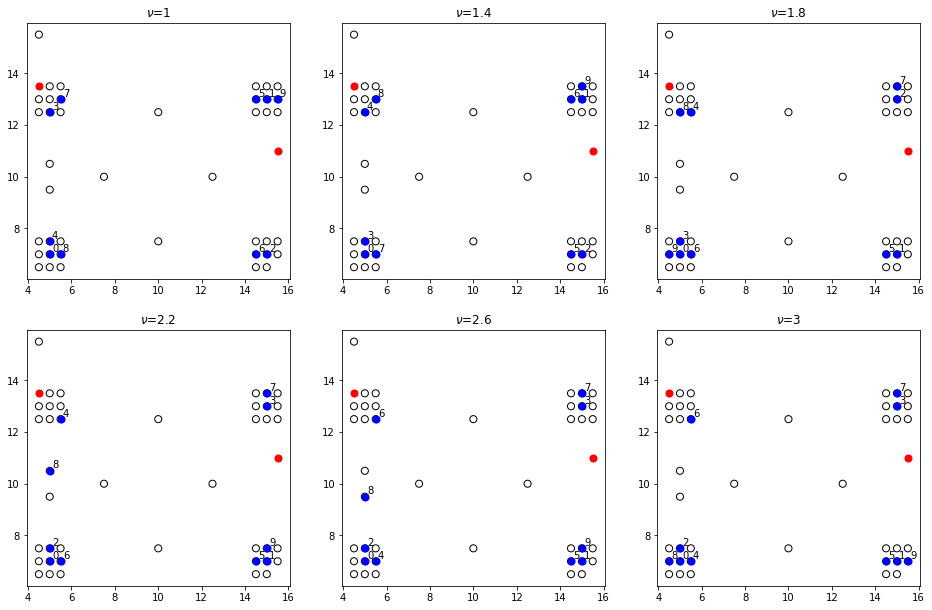

In [9]:
from submodlib import GraphCutConditionalGainFunction

nus = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(3,3,row*3+index)
    obj = GraphCutConditionalGainFunction(n=41, 
                                          num_privates=2, 
                                          lambdaVal=1, 
                                          data=groundData,
                                          privateData=mutlipleQueryData2,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Selection by FacilityLocationConditionalGain Function (FLCG)

### Single Private

[(9, 7.430880926549435), (24, 6.825510591268539), (27, 5.805917680263519), (12, 1.2724008336663246), (40, 1.0609320998191833), (35, 1.0363647565245628), (37, 0.8292862176895142), (36, 0.8292862176895142), (34, 0.7205005288124084), (38, 0.6321205496788025)]
[(9, 7.372877245768905), (24, 6.592066176235676), (27, 5.805917680263519), (40, 1.1516301482915878), (35, 1.0328961983323097), (37, 0.8292862176895142), (36, 0.8292862176895142), (34, 0.7205005288124084), (38, 0.48496878147125244), (39, 0.39346933364868164)]
[(9, 7.341261588037014), (24, 6.389868475496769), (27, 5.805917680263519), (40, 1.0265294909477234), (35, 1.0084523260593414), (37, 0.8292862176895142), (36, 0.8292862176895142), (34, 0.7205005288124084), (39, 0.39346933364868164), (30, 0.3744238018989563)]
[(9, 7.310049172490835), (24, 6.196133770048618), (27, 5.805917680263519), (35, 0.9840084537863731), (39, 0.8925624787807465), (37, 0.8292862176895142), (36, 0.8292862176895142), (34, 0.7205005288124084), (40, 0.39346933364868

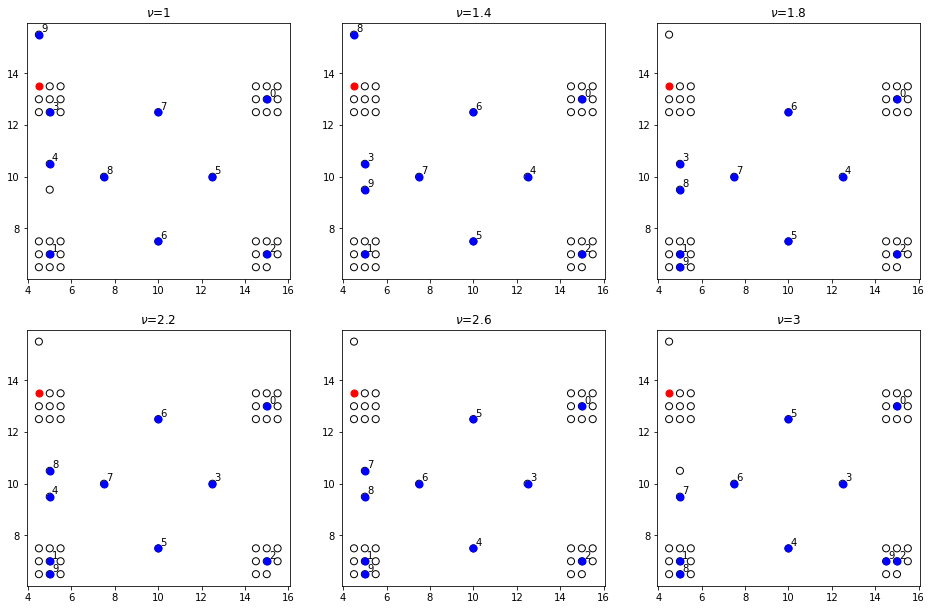

In [2]:
from submodlib import FacilityLocationConditionalGainFunction

nus = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(3,3,row*3+index)
    obj = FacilityLocationConditionalGainFunction(n=41, 
                                          num_privates=1, 
                                          data=groundData,
                                          privateData=singleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (1)

[(24, 6.7887194231152534), (9, 6.635459788143635), (12, 1.2724008336663246), (26, 1.1390740722417831), (40, 1.0609320998191833), (35, 0.9905519858002663), (37, 0.8292862176895142), (36, 0.8292862176895142), (34, 0.7205005288124084), (38, 0.6321205496788025)]
[(24, 6.535316839814186), (9, 6.4353552758693695), (40, 1.1516301482915878), (35, 1.0284104943275452), (37, 0.8292862176895142), (36, 0.8292862176895142), (34, 0.7205005288124084), (38, 0.48496878147125244), (39, 0.39346933364868164), (30, 0.3744238018989563)]
[(24, 6.3395489901304245), (9, 6.292885482311249), (40, 1.0265294909477234), (35, 0.9418464154005051), (37, 0.8292862176895142), (36, 0.8292862176895142), (34, 0.7205005288124084), (39, 0.39346933364868164), (30, 0.3744238018989563), (18, 0.3744238018989563)]
[(24, 6.152647256851196), (9, 6.152647256851196), (39, 0.8925624787807465), (37, 0.8655586838722229), (36, 0.8655586838722229), (35, 0.7805056571960449), (34, 0.7205005288124084), (40, 0.39346933364868164), (30, 0.374423

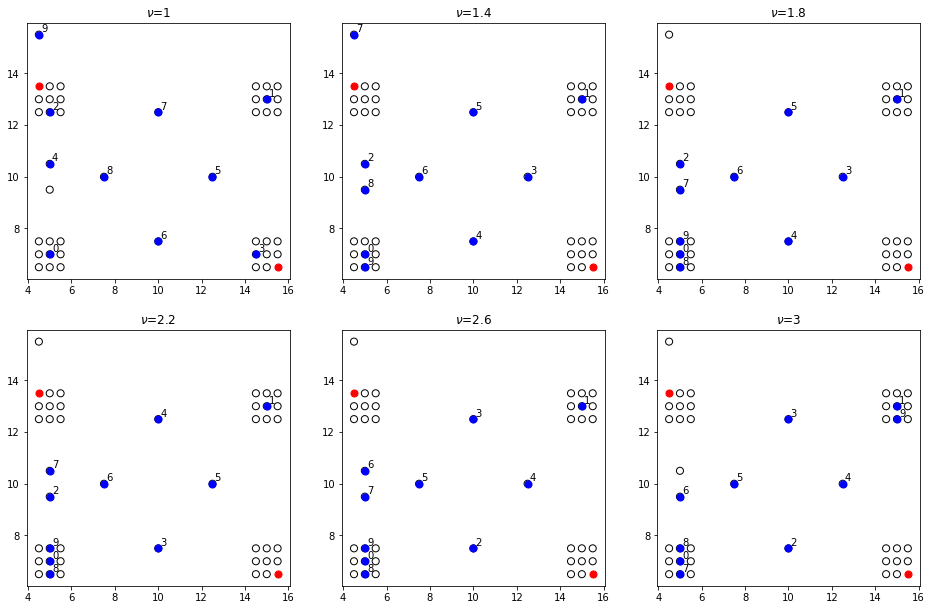

In [3]:
from submodlib import FacilityLocationConditionalGainFunction

nus = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(3,3,row*3+index)
    obj = FacilityLocationConditionalGainFunction(n=41, 
                                          num_privates=2, 
                                          data=groundData,
                                          privateData=mutlipleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (2)

[(24, 6.811425395309925), (27, 5.115702867507935), (9, 3.7342175245285034), (12, 1.2724008336663246), (40, 1.0609320998191833), (35, 0.9725340232253075), (37, 0.8292862176895142), (36, 0.8292862176895142), (34, 0.7205005288124084), (38, 0.6321205496788025)]
[(24, 6.562619496136904), (27, 4.673276603221893), (9, 2.4303802847862244), (40, 1.1516301482915878), (37, 0.9189321398735046), (36, 0.9144464731216431), (34, 0.7205005288124084), (35, 0.7119630575180054), (38, 0.48496878147125244), (39, 0.39346933364868164)]
[(24, 6.3514901623129845), (27, 4.230850338935852), (9, 1.3608492314815521), (40, 1.0265294909477234), (37, 0.9189321398735046), (36, 0.8900025486946106), (34, 0.7205005288124084), (35, 0.629666805267334), (39, 0.39346933364868164), (30, 0.3744238018989563)]
[(24, 6.152647256851196), (27, 3.788424015045166), (37, 0.9155118465423584), (39, 0.8925624787807465), (36, 0.8655586838722229), (3, 0.7399443984031677), (34, 0.7205005288124084), (35, 0.5473705530166626), (40, 0.3934693336

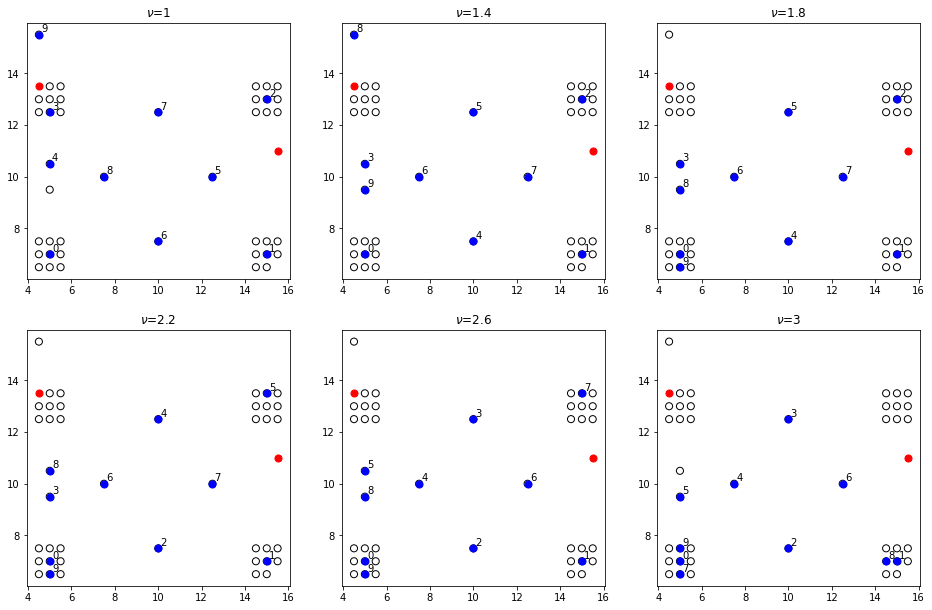

In [4]:
from submodlib import FacilityLocationConditionalGainFunction

nus = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(3,3,row*3+index)
    obj = FacilityLocationConditionalGainFunction(n=41, 
                                          num_privates=2, 
                                          data=groundData,
                                          privateData=mutlipleQueryData2,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Selection by LogDeterminantConditionalGain Function (LogDetCG)

### Single Private

[(28, 0.6931464742606372), (31, 0.6929236969184323), (2, 0.6927852476159603), (36, 0.6895170911131153), (37, 0.6879195620263773), (39, 0.6755222468385302), (35, 0.6719868020753778), (38, 0.6583001830424957), (34, 0.6558258124915881), (16, 0.6263720587231552)]
[(28, 0.6931457962128044), (2, 0.6927768844848236), (31, 0.6927175788447133), (37, 0.6894226073977713), (36, 0.6870921667386386), (35, 0.6720135555139358), (39, 0.6714568041218799), (34, 0.6545027689216629), (16, 0.626372077175096), (38, 0.6243954192162291)]
[(28, 0.693144892148482), (2, 0.6927624859565403), (31, 0.6924459304559778), (37, 0.68934529802252), (36, 0.6859383622447076), (35, 0.6720020776183384), (34, 0.6674802062478864), (39, 0.6511473061643547), (16, 0.6263719673598228), (17, 0.6035843725202666)]
[(28, 0.6931437620665283), (4, 0.6927513543104815), (31, 0.6921073119455889), (37, 0.6893081982911999), (36, 0.6859982679464379), (35, 0.673613186763848), (34, 0.6640127501326928), (39, 0.6453470952143245), (14, 0.6199916058

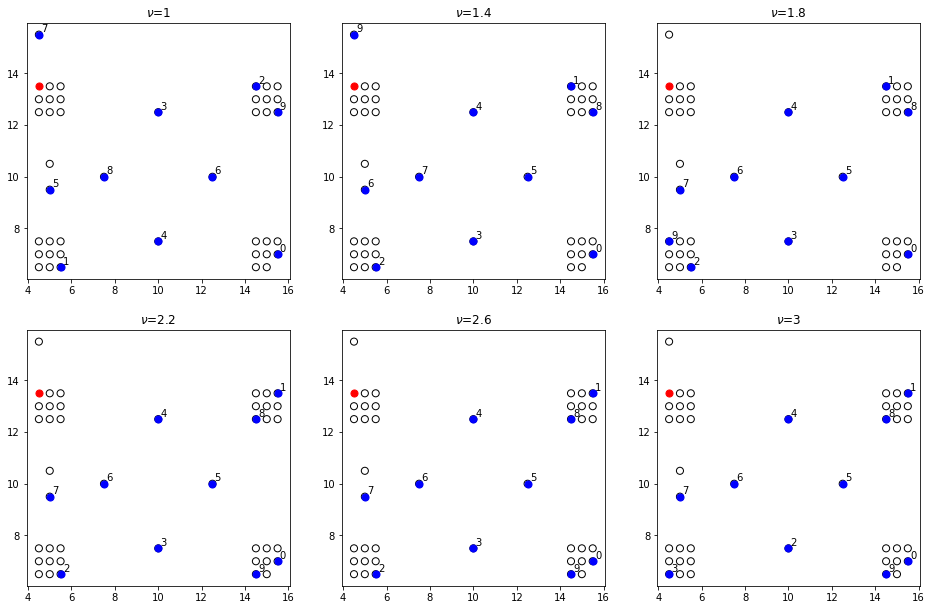

In [2]:
from submodlib import LogDeterminantConditionalGainFunction

nus = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(3,3,row*3+index)
    obj = LogDeterminantConditionalGainFunction(n=41, 
                                          num_privates=1, 
                                          lambdaVal=1,
                                          data=groundData,
                                          privateData=singleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(singlequeryxs, singlequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (1)

[(31, 0.6929235464184708), (2, 0.6929210694114385), (36, 0.689542430416797), (37, 0.6879772699895622), (39, 0.6755223398539705), (35, 0.6729784589077645), (38, 0.6583001830842748), (34, 0.6558262829543288), (16, 0.6266237515763896), (20, 0.6195972583518715)]
[(31, 0.6927088105871935), (2, 0.6927066200375664), (37, 0.6886036326971575), (36, 0.6870712432939682), (39, 0.6714896192380096), (35, 0.67090648054448), (34, 0.6545002176430967), (16, 0.6262708459086083), (38, 0.6243953911703178), (17, 0.603724724552972)]
[(31, 0.6924224244508909), (2, 0.6924205886410119), (36, 0.6873497692569762), (37, 0.6858606703724269), (34, 0.6681592032434782), (35, 0.6674728562601722), (39, 0.651147056677548), (16, 0.6257964065709498), (17, 0.6035841642642764), (38, 0.5767060556985398)]
[(2, 0.692064326297177), (31, 0.6920628901169145), (37, 0.6857790001025423), (36, 0.6843433564557709), (35, 0.6646602077343241), (34, 0.6639932560742313), (39, 0.6453464633389998), (16, 0.6251972160800258), (17, 0.60340484072

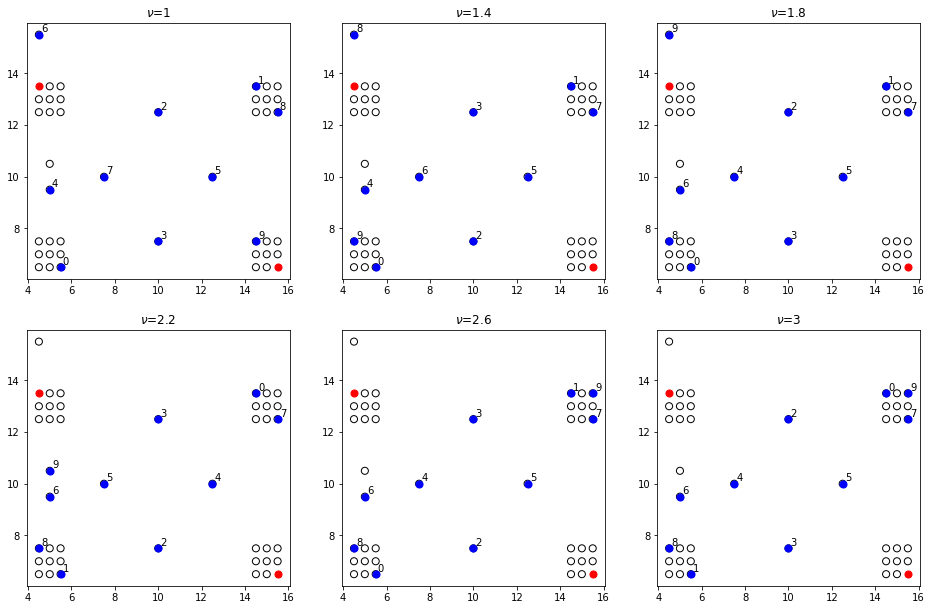

In [3]:
from submodlib import LogDeterminantConditionalGainFunction

nus = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(3,3,row*3+index)
    obj = LogDeterminantConditionalGainFunction(n=41, 
                                          num_privates=2, 
                                          lambdaVal=1,
                                          data=groundData,
                                          privateData=mutlipleQueryData,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

### Multiple Privates (2)

[(31, 0.6929306121241208), (36, 0.6912524732096029), (32, 0.6905198657541414), (37, 0.6863000333606536), (39, 0.6755217076227035), (2, 0.6737859869603497), (35, 0.6632205188889961), (38, 0.6583001509131357), (34, 0.6558173392327933), (22, 0.621767472389328)]
[(31, 0.6927226622984632), (37, 0.6898195002072404), (36, 0.6880371253589406), (33, 0.686415151264683), (39, 0.6714887598559072), (2, 0.6574978890999534), (35, 0.655809185646598), (34, 0.6544947201822765), (38, 0.6243950573059346), (17, 0.603724742155122)]
[(31, 0.6924453286324064), (37, 0.6892730284403653), (36, 0.6858532792231196), (33, 0.6830391394520166), (34, 0.6681208326253069), (39, 0.6511519128274887), (35, 0.6440151489956762), (2, 0.6346896418399979), (17, 0.6035842932826508), (22, 0.5877612787415737)]
[(31, 0.6920985532419903), (37, 0.688589409677364), (36, 0.6831128147209251), (32, 0.6789327917054154), (34, 0.664588559129093), (39, 0.6453497021556116), (35, 0.6272717566126935), (2, 0.6062458314246341), (17, 0.60340501557

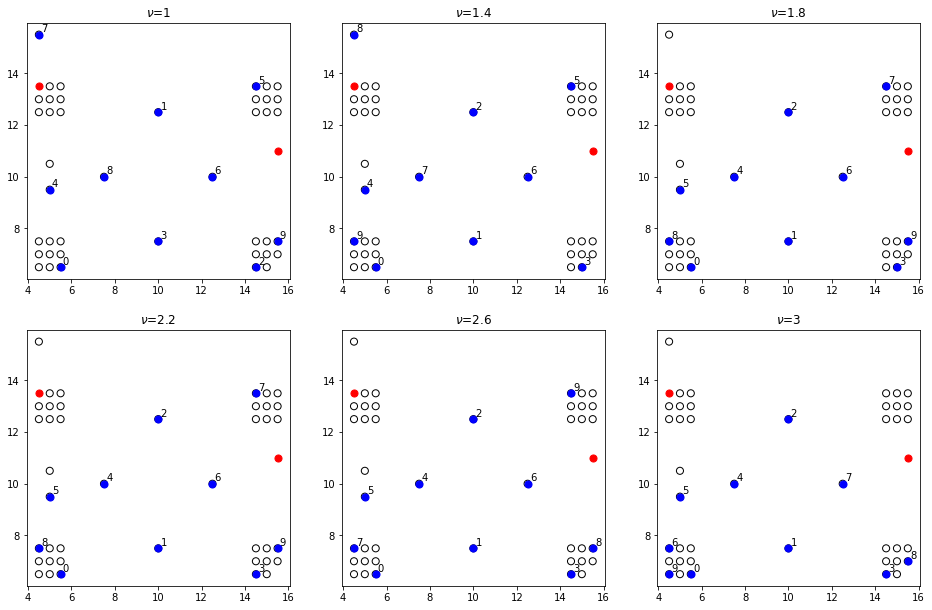

In [4]:
from submodlib import LogDeterminantConditionalGainFunction

nus = [1, 1.4, 1.8, 2.2, 2.6, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for nu in nus:
    plt.subplot(3,3,row*3+index)
    obj = LogDeterminantConditionalGainFunction(n=41, 
                                          num_privates=2,
                                          lambdaVal=1,
                                          data=groundData,
                                          privateData=mutlipleQueryData2,
                                          metric="euclidean", 
                                          privacyHardness=nu)
    greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, 
                              stopIfNegativeGain=False, verbose=False)
    print(greedyList)
    greedyXs = [groundxs[x[0]] for x in greedyList]
    greedyYs = [groundys[x[0]] for x in greedyList]
    plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
    plt.scatter(multiplequeryxs2, multiplequeryys2, s=50, color='red', label="Queries")
    plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
    for label, element in enumerate(greedyList):
        plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
    plt.title('$\\nu$='+str(nu))
    index += 1
    if index == 4:
        row += 1
        index = 1

## Selection by ProbabilisticSetCoverConditionalGain Function

In [2]:
import numpy as np
import random
from submodlib import ProbabilisticSetCoverConditionalGainFunction
num_concepts = 10
num_samples = 10
budget = 4
probs = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    probs.append([round(num, 2) for num in np.random.rand(num_concepts).tolist()])
privates = set(random.sample(range(num_concepts),2))
print("Private concepts: ", privates)
obj = ProbabilisticSetCoverConditionalGainFunction(n=num_samples, probs=probs, 
                                                   num_concepts=num_concepts, private_concepts=privates)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", probs[i], "\u2713")
    else:
        print(i, ": ", probs[i])
print("Greedy Ordered List: ", greedyList)
greedyProbs = []
for i in range(num_concepts):
    product = 1
    for elem in greedyIndices:
        product = product * (1-probs[elem][i])
    greedyProbs.append(round(1-product, 2))
print("Probabilities of concepts covered by greedy set: ", greedyProbs)

Private concepts:  {1, 2}
0 :  [0.42, 0.72, 0.0, 0.3, 0.15, 0.09, 0.19, 0.35, 0.4, 0.54]
1 :  [0.42, 0.69, 0.2, 0.88, 0.03, 0.67, 0.42, 0.56, 0.14, 0.2]
2 :  [0.8, 0.97, 0.31, 0.69, 0.88, 0.89, 0.09, 0.04, 0.17, 0.88] ✓
3 :  [0.1, 0.42, 0.96, 0.53, 0.69, 0.32, 0.69, 0.83, 0.02, 0.75]
4 :  [0.99, 0.75, 0.28, 0.79, 0.1, 0.45, 0.91, 0.29, 0.29, 0.13]
5 :  [0.02, 0.68, 0.21, 0.27, 0.49, 0.05, 0.57, 0.15, 0.59, 0.7]
6 :  [0.1, 0.41, 0.69, 0.41, 0.05, 0.54, 0.66, 0.51, 0.94, 0.59] ✓
7 :  [0.9, 0.14, 0.14, 0.81, 0.4, 0.17, 0.93, 0.35, 0.75, 0.73] ✓
8 :  [0.88, 0.62, 0.75, 0.35, 0.27, 0.9, 0.43, 0.96, 0.66, 0.62] ✓
9 :  [0.11, 0.95, 0.45, 0.58, 0.41, 0.24, 0.9, 0.57, 0.0, 0.62]
Greedy Ordered List:  [(8, 5.069999992847443), (7, 2.019999988675117), (2, 0.6634940278257131), (6, 0.13376966740467172)]
Probabilities of concepts covered by greedy set:  [1.0, 0.99, 0.95, 0.98, 0.95, 1.0, 0.99, 0.99, 1.0, 0.99]


## Selection by Set Cover Conditional Gain Function

In [2]:
import numpy as np
import random
from submodlib import SetCoverConditionalGainFunction
num_concepts = 20
num_samples = 15
budget = 4
cover_set = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    cover_set.append(set(random.sample(list(range(num_concepts)), random.randint(0,num_concepts/2))))
    printable = ["\u25A1"]*num_concepts
    #print(''.join(map(str, temp)))
    for ind, val in enumerate(printable):
        if ind in cover_set[i]:
            printable[ind] = "\u25A0"
    #print(i, ": ", ''.join(map(str, printable)))
    printables.append(printable)
    #printable = ["\u25A0" if index in cover_set[i] for index, val in enumerate(temp)]
privates = set(random.sample(range(num_concepts),2))
print("Private set: ", privates)
obj = SetCoverConditionalGainFunction(n=num_samples, cover_set=cover_set, 
                                        num_concepts=num_concepts, private_concepts=privates)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})", "\u2713")
    else:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})")
print("Greedy Ordered List: ", greedyList)
greedyConcepts = set()
for elem in greedyIndices:
    greedyConcepts = greedyConcepts.union(cover_set[elem])
print("Concepts Covered by Greedy Set: ", greedyConcepts)
greedyPrintable = ["\u25A1"]*num_concepts
for ind, val in enumerate(greedyPrintable):
    if ind in greedyConcepts:
        greedyPrintable[ind] = "\u25A0"
print("Concepts Covered by Greedy Set: ", ''.join(map(str, greedyPrintable)))

Private set:  {0, 6}
0 :  □□■□□□□□□□□□□□□□□□■□ (2)
1 :  □□□■□□□□□□□□□□■■□□■□ (4)
2 :  ■□□■□□■□□■□□■■■■□□■■ (10)
3 :  □□□□□□□□□□□□□□□□□□□□ (0)
4 :  ■□□■□□□■■□■□□□■■□□□□ (7)
5 :  ■□□■□□■■■□□■■■□□□■■□ (10)
6 :  □□□□□□□■□□□■■□□■■■■□ (7)
7 :  ■□□■□□□□□□□□□■□□□■□□ (4) ✓
8 :  □□□■□□□□□■□□□□□□□□□□ (2)
9 :  □□□□□□■□□■□□□■□□■□□■ (5) ✓
10 :  □□□□□□□□□□□□■□□■■□■□ (4)
11 :  □■■□□■□■■□■□■■□■□□□□ (9) ✓
12 :  □□■■□■■□■□□■■□■□■□■□ (10) ✓
13 :  ■■■□□□□□□■■□■□□■□□□□ (7)
14 :  □□□□□□□■□□□□□□□□■□□□ (2)
Greedy Ordered List:  [(12, 9.0), (11, 5.0), (9, 2.0), (7, 1.0)]
Concepts Covered by Greedy Set:  {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}
Concepts Covered by Greedy Set:  ■■■■□■■■■■■■■■■■■■■■


# Conditional Mutual Information Functions

## Hand-crafted data with queries and privates

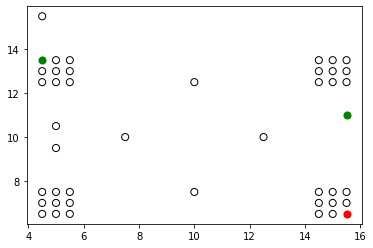

In [2]:
import numpy as np
import matplotlib.pyplot as plt
groundData =np.array( [(5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), 
(7.5,10), (12.5,10), (10,12.5), (10,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )
groundxs = [x[0] for x in groundData]
groundys = [x[1] for x in groundData]

mutlipleQueryData = np.array([(4.5,13.5), (15.5,11)])
multiplequeryxs = [x[0] for x in mutlipleQueryData]
multiplequeryys = [x[1] for x in mutlipleQueryData]

singlePrivateData = np.array([(15.5,6.5)])
singleprivatexs = [x[0] for x in singlePrivateData]
singleprivateys = [x[1] for x in singlePrivateData]

plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
plt.scatter(singleprivatexs, singleprivateys, s=50, color='red', label="Privates")

## Selection by FacilityLocationConditionalMutualInformation (FLCMI)

[(6, 6.14842395298183), (14, 2.961071200668812), (38, 0.08837997913360596), (35, 0.004001796245574951), (40, 0.0), (39, 0.0), (37, 0.0), (36, 0.0), (34, 0.0), (33, 0.0)]
[(6, 6.044605443254113), (14, 2.510705590248108), (38, 0.08837997913360596), (35, 0.004001796245574951), (40, 0.0), (39, 0.0), (37, 0.0), (36, 0.0), (34, 0.0), (33, 0.0)]
[(6, 5.940786842256784), (15, 2.1579117476940155), (38, 0.08837997913360596), (40, 0.0), (39, 0.0), (37, 0.0), (36, 0.0), (35, 0.0), (34, 0.0), (33, 0.0)]
[(6, 7.534960743039846), (15, 5.906808748841286), (12, 0.6625975519418716), (38, 0.45625942945480347), (7, 0.31967639178037643), (35, 0.274734765291214), (40, 0.25972602516412735), (11, 0.22119921445846558), (5, 0.22119921445846558), (1, 0.22119921445846558)]
[(6, 7.43114223331213), (15, 5.485269717872143), (12, 0.6625975519418716), (38, 0.45625942945480347), (7, 0.31967639178037643), (40, 0.25972602516412735), (35, 0.23021049052476883), (11, 0.22119921445846558), (5, 0.22119921445846558), (1, 0.221

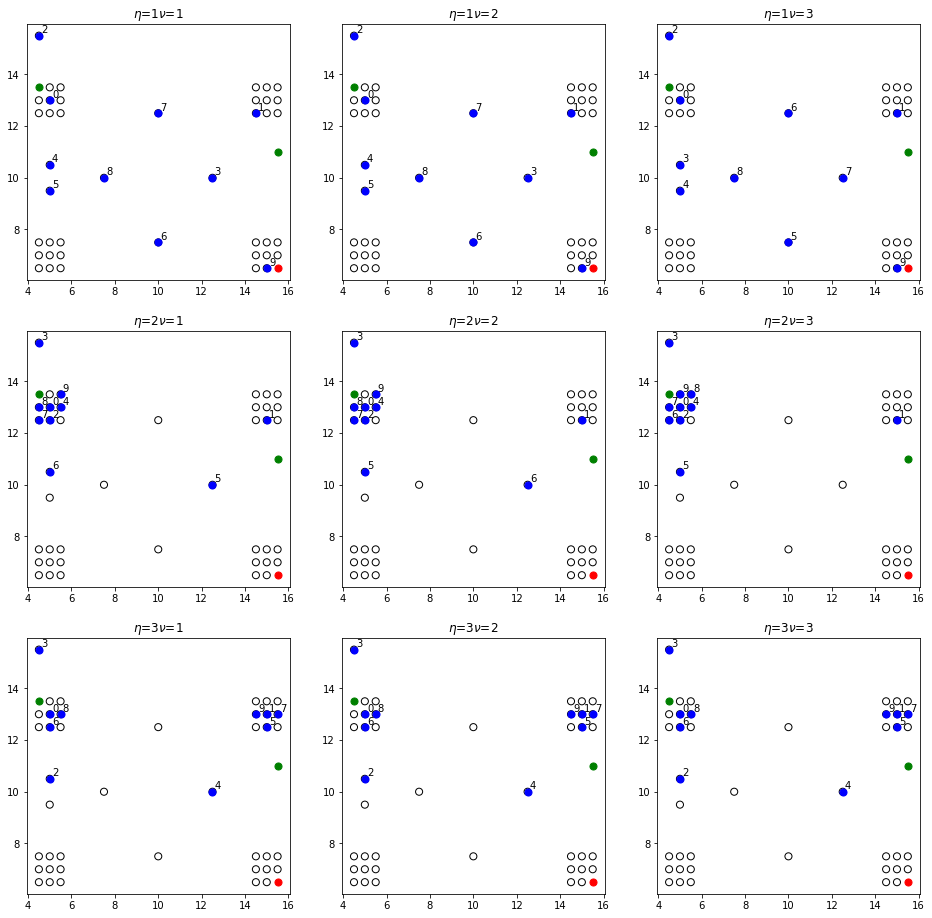

In [10]:
from submodlib import FacilityLocationConditionalMutualInformationFunction
etas = [1, 2, 3]
nus = [1, 2, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    for nu in nus:
        plt.subplot(3,3,row*3+index)
        obj = FacilityLocationConditionalMutualInformationFunction(n=41, 
                                                                   num_queries=2, 
                                                                   num_privates=1, 
                                                                   data=groundData, 
                                                                   queryData=mutlipleQueryData, 
                                                                   privateData=singlePrivateData,  
                                                                   metric="euclidean",
                                                                  magnificationLambda=eta,
                                                                  privacyHardness=nu)
        greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
        print(greedyList)
        greedyXs = [groundxs[x[0]] for x in greedyList]
        greedyYs = [groundys[x[0]] for x in greedyList]
        plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
        plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
        plt.scatter(singleprivatexs, singleprivateys, s=50, color='red', label="Privates")
        plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
        for label, element in enumerate(greedyList):
            plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
        plt.title('$\eta$='+str(eta)+'$\\nu$='+str(nu))
        index += 1
        if index == 4:
            row += 1
            index = 1

## Selection by LogDeterminantConditionalMutualInformation (LogDetCMI)

[(0, 0.1644439973192552), (5, 0.08975360010612127), (16, 0.05694117785523556), (6, 0.027024864629326073), (15, 0.02277113247490603), (1, 0.01162463841328426), (11, 0.01023851710355278), (14, 0.010233545396859667), (38, 0.007869310325415269), (35, 0.005225561587671623)]
[(0, 0.16444365323217325), (5, 0.08975373360190314), (16, 0.056396724729339875), (6, 0.02702502572750093), (15, 0.022596411292733043), (1, 0.01162476597704265), (11, 0.0102386310365703), (14, 0.0101551186742741), (38, 0.007869331371360255), (35, 0.005083234206967657)]
[(0, 0.16444361012775077), (5, 0.0897542300845185), (16, 0.05592588046287672), (6, 0.0270254702451998), (15, 0.022495088521950812), (22, 0.014586600066599287), (1, 0.01162726021188909), (14, 0.011157171039144875), (11, 0.010240188186317), (35, 0.008493679184890857)]
[(0, 0.9327765735992352), (5, 1.3485105853700405), (6, 1.6592483951536905), (13, 1.0496076746793945), (16, 0.2532141858645507), (40, 0.24080424904198383), (15, 0.11779197254800666), (14, 0.05714

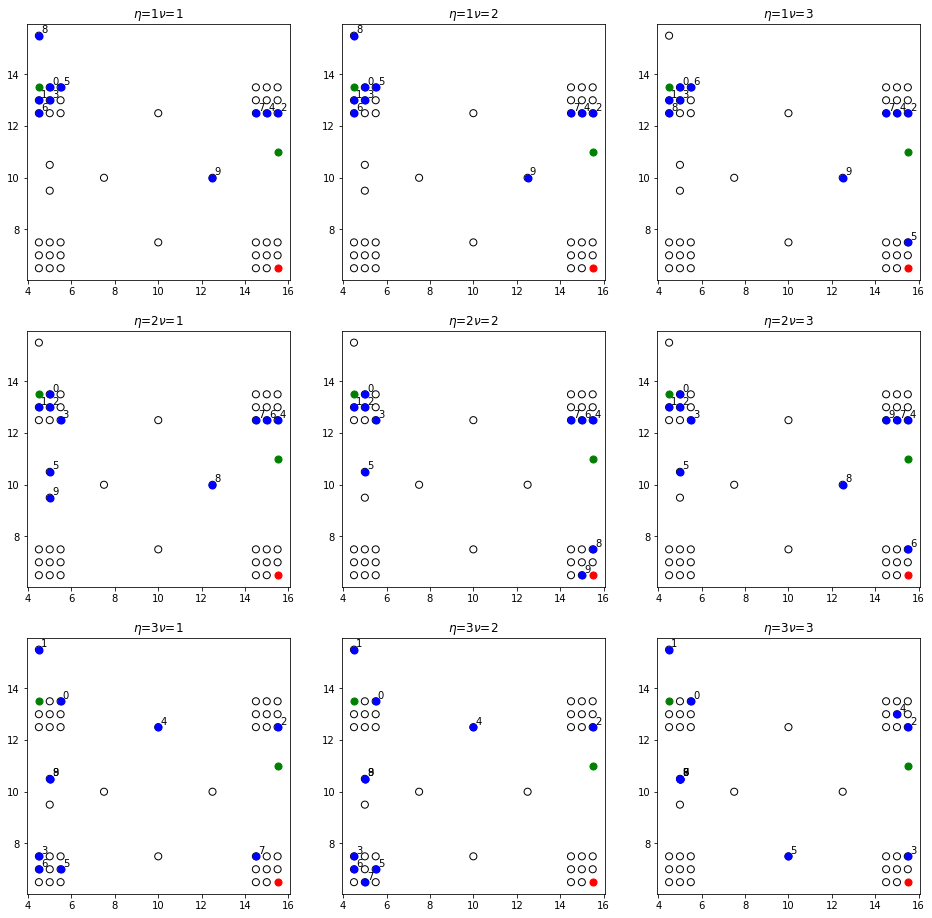

In [3]:
from submodlib import LogDeterminantConditionalMutualInformationFunction
etas = [1, 2, 3]
nus = [1, 2, 3]
row = 0
index = 1
plt.figure(figsize = (16, 16))
for eta in etas:
    for nu in nus:
        plt.subplot(3,3,row*3+index)
        obj = LogDeterminantConditionalMutualInformationFunction(n=41, 
                                                                   num_queries=2, 
                                                                   num_privates=1, 
                                                                   data=groundData, 
                                                                   queryData=mutlipleQueryData, 
                                                                   privateData=singlePrivateData,  
                                                                   metric="euclidean",
                                                                  magnificationLambda=eta,
                                                                  privacyHardness=nu, lambdaVal=1)
        greedyList = obj.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
        print(greedyList)
        greedyXs = [groundxs[x[0]] for x in greedyList]
        greedyYs = [groundys[x[0]] for x in greedyList]
        plt.scatter(groundxs, groundys, s=50, facecolors='none', edgecolors='black', label="Images")
        plt.scatter(multiplequeryxs, multiplequeryys, s=50, color='green', label="Queries")
        plt.scatter(singleprivatexs, singleprivateys, s=50, color='red', label="Privates")
        plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
        for label, element in enumerate(greedyList):
            plt.annotate(label, (groundxs[element[0]], groundys[element[0]]), (groundxs[element[0]]+0.1, groundys[element[0]]+0.1))
        plt.title('$\eta$='+str(eta)+'$\\nu$='+str(nu))
        index += 1
        if index == 4:
            row += 1
            index = 1

## Selection by SetCoverConditionalMutualInformation Function [SCCMI]

In [1]:
import numpy as np
import random
from submodlib import SetCoverConditionalMutualInformationFunction
num_concepts = 20
num_samples = 15
budget = 4
cover_set = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    cover_set.append(set(random.sample(list(range(num_concepts)), random.randint(0,num_concepts/2))))
    printable = ["\u25A1"]*num_concepts
    #print(''.join(map(str, temp)))
    for ind, val in enumerate(printable):
        if ind in cover_set[i]:
            printable[ind] = "\u25A0"
    #print(i, ": ", ''.join(map(str, printable)))
    printables.append(printable)
    #printable = ["\u25A0" if index in cover_set[i] for index, val in enumerate(temp)]
queries = set(random.sample(range(num_concepts),2))
set_concepts = set(range(num_concepts))
set_concepts_minus_queries = set_concepts - queries
privates = set(random.sample(set_concepts_minus_queries, 1))
print("Query set: ", queries)
print("Private set: ", privates)
obj = SetCoverConditionalMutualInformationFunction(n=num_samples, cover_set=cover_set, 
                                        num_concepts=num_concepts, query_concepts=queries, private_concepts=privates)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})", "\u2713")
    else:
        print(i, ": ", ''.join(map(str, printables[i])), f"({len(cover_set[i])})")
print("Greedy Ordered List: ", greedyList)
greedyConcepts = set()
for elem in greedyIndices:
    greedyConcepts = greedyConcepts.union(cover_set[elem])
print("Concepts Covered by Greedy Set: ", greedyConcepts)
greedyPrintable = ["\u25A1"]*num_concepts
for ind, val in enumerate(greedyPrintable):
    if ind in greedyConcepts:
        greedyPrintable[ind] = "\u25A0"
print("Concepts Covered by Greedy Set: ", ''.join(map(str, greedyPrintable)))

Query set:  {0, 6}
Private set:  {19}
0 :  □□■□□□□□□□□□□□□□□□■□ (2)
1 :  □□□■□□□□□□□□□□■■□□■□ (4)
2 :  ■□□■□□■□□■□□■■■■□□■■ (10)
3 :  □□□□□□□□□□□□□□□□□□□□ (0)
4 :  ■□□■□□□■■□■□□□■■□□□□ (7)
5 :  ■□□■□□■■■□□■■■□□□■■□ (10) ✓
6 :  □□□□□□□■□□□■■□□■■■■□ (7)
7 :  ■□□■□□□□□□□□□■□□□■□□ (4)
8 :  □□□■□□□□□■□□□□□□□□□□ (2)
9 :  □□□□□□■□□■□□□■□□■□□■ (5)
10 :  □□□□□□□□□□□□■□□■■□■□ (4)
11 :  □■■□□■□■■□■□■■□■□□□□ (9)
12 :  □□■■□■■□■□□■■□■□■□■□ (10) ✓
13 :  ■■■□□□□□□■■□■□□■□□□□ (7) ✓
14 :  □□□□□□□■□□□□□□□□■□□□ (2) ✓
Greedy Ordered List:  [(5, 2.0), (14, 0.0), (13, 0.0), (12, 0.0)]
Concepts Covered by Greedy Set:  {0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}
Concepts Covered by Greedy Set:  ■■■■□■■■■■■■■■■■■■■□


<ipython-input-1-5a9dcc5d69f1>:25: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  privates = set(random.sample(set_concepts_minus_queries, 1))


## Selection by ProbabilisticSetCoverConditionalMutualInformation Function [PSCCMI]

In [1]:
import numpy as np
import random
from submodlib import ProbabilisticSetCoverConditionalMutualInformationFunction
num_concepts = 10
num_samples = 10
budget = 4
probs = []
np.random.seed(1)
random.seed(1)
#concept_weights = np.random.rand(num_concepts).tolist()
printables = []
for i in range(num_samples):
    probs.append([round(num, 2) for num in np.random.rand(num_concepts).tolist()])
queries = set(random.sample(range(num_concepts),2))
set_concepts = set(range(num_concepts))
set_concepts_minus_queries = set_concepts - queries
privates = set(random.sample(set_concepts_minus_queries, 1))
print("Query set: ", queries)
print("Private set: ", privates)
obj = ProbabilisticSetCoverConditionalMutualInformationFunction(n=num_samples, probs=probs, 
                                                   num_concepts=num_concepts, query_concepts=queries, private_concepts=privates)
greedyList = obj.maximize(budget=budget, optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyIndices = [x[0] for x in greedyList]
for i in range(num_samples):
    if i in greedyIndices:
        print(i, ": ", probs[i], "\u2713")
    else:
        print(i, ": ", probs[i])
print("Greedy Ordered List: ", greedyList)
greedyProbs = []
for i in range(num_concepts):
    product = 1
    for elem in greedyIndices:
        product = product * (1-probs[elem][i])
    greedyProbs.append(round(1-product, 2))
print("Probabilities of concepts covered by greedy set: ", greedyProbs)

Query set:  {1, 2}
Private set:  {6}
0 :  [0.42, 0.72, 0.0, 0.3, 0.15, 0.09, 0.19, 0.35, 0.4, 0.54]
1 :  [0.42, 0.69, 0.2, 0.88, 0.03, 0.67, 0.42, 0.56, 0.14, 0.2]
2 :  [0.8, 0.97, 0.31, 0.69, 0.88, 0.89, 0.09, 0.04, 0.17, 0.88] ✓
3 :  [0.1, 0.42, 0.96, 0.53, 0.69, 0.32, 0.69, 0.83, 0.02, 0.75] ✓
4 :  [0.99, 0.75, 0.28, 0.79, 0.1, 0.45, 0.91, 0.29, 0.29, 0.13]
5 :  [0.02, 0.68, 0.21, 0.27, 0.49, 0.05, 0.57, 0.15, 0.59, 0.7]
6 :  [0.1, 0.41, 0.69, 0.41, 0.05, 0.54, 0.66, 0.51, 0.94, 0.59]
7 :  [0.9, 0.14, 0.14, 0.81, 0.4, 0.17, 0.93, 0.35, 0.75, 0.73]
8 :  [0.88, 0.62, 0.75, 0.35, 0.27, 0.9, 0.43, 0.96, 0.66, 0.62] ✓
9 :  [0.11, 0.95, 0.45, 0.58, 0.41, 0.24, 0.9, 0.57, 0.0, 0.62] ✓
Greedy Ordered List:  [(9, 1.399999976158142), (3, 0.5490000039935108), (2, 0.03495001347661105), (8, 0.011924405973064855)]
Probabilities of concepts covered by greedy set:  [0.98, 1.0, 1.0, 0.96, 0.98, 0.99, 0.98, 1.0, 0.72, 1.0]


<ipython-input-1-5c4f9b0296ea>:17: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  privates = set(random.sample(set_concepts_minus_queries, 1))
